<a href="https://colab.research.google.com/github/ProudPP/ProudPP.github.io/blob/main/cmu5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pythainlp
!pip install attacut

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 75.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=3367aedd1725834c8b75b5d162a1768b7a9c5e9366b90a6cbce2a7a09add60d9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=44ea5ab29c2b0afcd4dd2b96f8690943e00a53170a79f39333ecd1b78754ed6f
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successful

In [3]:
import pandas as pd
import re
from pythainlp import word_tokenize
from copy import deepcopy

# โหลดข้อมูลจากไฟล์ Excel
file_path = '/content/drive/MyDrive/วิทยานิพนธ์-พีรยา/บทความ/ตอบกลับ-แบบสอบถามสุขภาวะด้านอาชีพของครู.xlsx'
df = pd.read_excel(file_path)

# สร้าง original_dict
original_dict = {
    "cognitive_well_being": [
        "การรับรู้ความสามารถในตนเอง", "แรงจูงใจ", "การพัฒนาตนเอง",
        "เป้าหมายชีวิต", "ความคิดสร้างสรรค์", "การวางแผน", "ความคิดเชิงบวก",
        "การแก้ปัญหา", "ความมุ่งมั่น", "การตั้งเป้าหมาย", "ความท้าทาย",
        "การเรียนรู้", "การตัดสินใจ", "การคิดเชิงวิพากษ์"
    ],
    "subjective_well_being": [
        "ความพึงพอใจในชีวิต", "ความพึงพอใจในงาน", "ภาระงาน", "ความเครียด",
        "ความสุข", "ความสมดุลชีวิต", "ความเหนื่อยล้า", "ความวิตกกังวล",
        "แรงกดดัน", "ความท้อแท้", "การพักผ่อน", "ความยืดหยุ่น",
        "ความสมหวัง", "ความมั่นใจ"
    ],
    "physical_and_mental_well_being": [
        "สุขภาพร่างกาย", "สุขภาพจิตใจ", "ความมั่นคงทางอารมณ์", "ความเหนื่อยล้า",
        "อาการป่วย", "การออกกำลังกาย", "การพักผ่อน", "ความเครียดสะสม",
        "การนอนหลับ", "ความเจ็บป่วยเรื้อรัง", "สุขภาพจิต", "การดูแลตัวเอง",
        "ความฟื้นตัว", "สมรรถภาพร่างกาย"
    ],
    "social_well_being": [
        "การสนับสนุนจากผู้บริหาร", "ความสัมพันธ์กับเพื่อนร่วมงาน",
        "ความสัมพันธ์กับนักเรียน", "บรรยากาศโรงเรียน", "การทำงานเป็นทีม",
        "ความขัดแย้ง", "ความเข้าใจกัน", "การสื่อสาร", "การให้ความช่วยเหลือ",
        "ความไว้วางใจ", "การร่วมมือ", "การพูดคุย", "การสนทนา", "ความเคารพ",
        "การแลกเปลี่ยน", "มิตรภาพ", "การสนับสนุน", "ความเชื่อใจ", "การประสานงาน",
        "สนับสนุน", "เข้าใจ", "รับฟัง", "วิสัยทัศน์", "ส่งเสริม",
        "พัฒนา", "เป็นแบบอย่าง", "เอาใจใส่", "โปร่งใส", "ยุติธรรม",
        "ใจดี", "เป็นกันเอง", "อิสระ", "นักพัฒนา", "ช่วยเหลือ",
        "การทำงานร่วมกัน", "กัลยาณมิตร", "ความสามัคคี", "ความทุ่มเท",
        "การให้คำแนะนำ", "ความเห็นอกเห็นใจ", "การช่วยเหลือกัน", "การสนับสนุนกัน",
        "ความเกื้อกูล", "การร่วมมือแก้ไขปัญหา", "ความเป็นทีม", "ความสัมพันธ์ที่ดี",
        "น้ำใจ", "ความรับผิดชอบ", "ความเป็นมิตร", "ความแตกต่างทางความคิด",
        "ความอดทน", "เคารพซึ่งกันและกัน", "การสนทนาอย่างเปิดใจ",
        "เอื้อเฟื้อเผื่อแผ่", "ใจกว้าง", "ยอมรับความแตกต่าง",
        "เฮฮา", "การสนับสนุนเชิงสร้างสรรค์", "ความเก่ง", "ความสามารถ",
        "การช่วยเหลือซึ่งกันและกัน", "ความเข้าใจระหว่างเพื่อนร่วมงาน",
        "ทำงานร่วมกัน", "พึ่งพาอาศัย", "ปรองดอง",
        "ปรึกษาหารือ", "ความรู้สึกเป็นครอบครัว","เฮงซวย","toxic","leader","boss",
        "mindset","แบบอย่าง","บ้าอำนาจ","ผู้นำ","อะลุ่มอล่วย","อำนวยความสะดวก","ภาระงาน"
        "อำนวยการ"
        ]
}

In [4]:
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize
from pythainlp.tag import pos_tag
from pythainlp.corpus import thai_stopwords


# รวมคำที่ไม่มีความหมาย (Stopwords)
meaningless_words = set(thai_stopwords()) | {
    '', 'ที่', 'ใน', 'เป็น', 'ได้', 'ก็', 'และ', 'จะ', 'คน', 'ของ', 'การ', 'นะ', 'ค่ะ', 'ครับ',
    'ไป', 'มา', 'อีก', 'มาก', 'น้อย', 'โดย', 'หรือ', 'กับ', 'ๆ', 'อย่าง', 'ซึ่ง', 'เอง', 'ทุก',
    'เห็น', 'ค่อนข้าง', 'เสมอ', 'ให้', 'เยอะ', 'อย่า', 'เป็นที่', 'ทาง', 'สำหรับ', 'อยู่ตัว',
    'น่าจะ', 'โย', 'เดิม', 'สิ่ง', 'พูด', 'ชอบ', 'จบ', 'เท่าไหร่', 'รองรับ', 'เอา', 'บ',
    'คราว', 'เท่า', 'ขม', 'อาศัย', 'บ่อยๆ', 'ด่า', 'มากขึ้น', 'เท่ากับ', 'สูงสุด', 'ไม่',
    'มี', 'กัน', 'เพิ่ง', 'เพราะ', 'มักจะ', 'ไม่ค่อย', 'บางครั้ง', 'ดี', 'อยู่', 'ได้รับ',
    'รู้จัก', 'ทำ', 'ขาด', 'รู้สึก', 'คือ', 'ต', '_', 'ดู', 'หา', 'คอย', 'เจอ', 'รู้',
    'ยึด','อำ','สร้าง','ลด','ขึ้นอยู่กับ','ว่าง','สาม','อำนวย','กอง','แบ่ง','เหมือน',
    'นับว่า','มีผลต่อ','มีเรื่อง','แทน','ฟัง','เฉยๆ','ดิฉัน'
}

# คำแทนที่ (Replacements)
replacements = {
    "ผอ": "ผอ_",
    "ผู้อำนวยการ": "ผู้อำนวย_การ",
    "อำนวยการ": "อำนวย_การ",
    "เพื่อนร่วมงาน": "เพื่อน_ร่วม_งาน",
    "แบบอย่าง": "แบบ_อย่าง",
    "เพื่อนครู": "เพื่อน_ครู",
    "อาจารย์": "อาจารย์_",
    "ทำงาน": "ทำ_งาน",
    "คอยดูแล": "คอย_ดู_แล",
    "รู้สึกดี": "รู้สึก_ดี",
    "รู้สึกแย่": "รู้สึก_แย่",
    "ช่วยเหลือ": "ช่วย_เหลือ",
    "ช่วยเหลือเกื้อกูล": "ช่วย_เหลือ_เกื้อ_กูล",
    "ดูแล": "ดู_แล",
    "ครูใหญ่": "ครู_ใหญ่",
    "ผู้บริหาร": "ผู้_บริหาร",
    "นักเรียน": "นัก_เรียน",
    "สถานศึกษา": "สถาน_ศึกษา",
    "เชื่อฟัง": "เชื่อ_ฟัง",
    "ตั้งใจเรียน": "ตั้งใจ_เรียน",
    "เรียนรู้": "เรียน_รู้",
    "หาทางแก้ไข": "หาทาง_แก้ไข",
    "อำนวยความสะดวก": "อำนวย_ความ_สะดวก",
    "อะลุ่มอล่วย": "อะลุ่ม_อล่วย",
    "นอกเหนือจากการสอน": "นอกเหนือจาก_การสอน",
    "ปฏิบัติ": "ปฏิบัติ_",
    "ปฏิเสธ": "ปฏิเสธ_",
    "สามารถ": "สามารถ_",
    "เคารพ": "ความเคารพ"
}

# ฟังก์ชันการแทนคำและการล้างข้อความ
def tokenize_and_filter(text, important_words):
    if pd.isnull(text) or not isinstance(text, str) or text.strip() == "":
        return []

    # การแทนคำ
    for key, value in replacements.items():
        text = text.replace(key, value)

    # ลบตัวอักษรที่ไม่ใช่ภาษาไทยหรืออังกฤษ
    text = re.sub(r"[^\u0E00-\u0E7Fa-zA-Z\s.]", "", text)

    # ตัดคำ
    tokens = word_tokenize(text, engine="newmm")

    # POS tagging
    pos_tags = pos_tag(tokens)

    # กรองคำโดยใช้ stopwords และ POS โดยคงคำสำคัญไว้
    filtered_tokens = [
        word for word, tag in pos_tags
        if word in important_words or (word not in meaningless_words and tag in {'VACT', 'VSTA', 'ADJ', 'ADV'})
    ]

    return filtered_tokens

# กำหนดคำสำคัญจาก original_dict
important_words = set(sum(original_dict.values(), []))

# ล้างข้อความในแต่ละคอลัมน์
df["tokens_combined"] = (
    df["dir_view"].fillna("") + " " +
    df["col_view"].fillna("") + " " +
    df["std_view"].fillna("")
).apply(lambda text: tokenize_and_filter(text, important_words))

df["tokens_dir"] = df["dir_view"].fillna("").apply(lambda text: tokenize_and_filter(text, important_words))
df["tokens_col"] = df["col_view"].fillna("").apply(lambda text: tokenize_and_filter(text, important_words))
df["tokens_std"] = df["std_view"].fillna("").apply(lambda text: tokenize_and_filter(text, important_words))

# ตรวจสอบผลลัพธ์เบื้องต้น
print("ผลลัพธ์หลังล้างข้อความ:")
print(df[["tokens_combined", "tokens_dir", "tokens_col", "tokens_std"]].head())


ผลลัพธ์หลังล้างข้อความ:
                                     tokens_combined  \
0             [ช่วยเหลือ, สนับสนุน, คุย, สำเร็จ, ดุ]   
1                  [ตรงกัน, เห็นคุณค่า, ตั้งใจ, ติด]   
2                                [ปฏิบัติงาน, toxic]   
3                                [ช่วยเหลือ, น่ารัก]   
4  [ความไว้วางใจ, พอใจ, แสดงท่าทาง, เหมาะสม, บั่น...   

                                          tokens_dir   tokens_col  \
0                              [ช่วยเหลือ, สนับสนุน]     [สำเร็จ]   
1                                                 []     [ตรงกัน]   
2                                       [ปฏิบัติงาน]      [toxic]   
3                                                 []  [ช่วยเหลือ]   
4  [ความไว้วางใจ, พอใจ, แสดงท่าทาง, เหมาะสม, บั่น...           []   

                  tokens_std  
0                       [ดุ]  
1  [เห็นคุณค่า, ตั้งใจ, ติด]  
2                         []  
3                   [น่ารัก]  
4            [ตั้งใจ, เรียน]  


ค่าเฉลี่ย

In [102]:
# ตรวจสอบว่าคอลัมน์ที่สนใจมีอยู่ใน DataFrame
columns_to_calculate = ["dir_relation", "col_relation", "std_relation"]

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
mean_values = df[columns_to_calculate].mean()
std_values = df[columns_to_calculate].std()

# แสดงผล
print("ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของแต่ละคอลัมน์:")
for column in columns_to_calculate:
    print(f"{column}:")
    print(f"  Mean: {mean_values[column]:.2f}")
    print(f"  Std: {std_values[column]:.2f}")


ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของแต่ละคอลัมน์:
dir_relation:
  Mean: 3.00
  Std: 0.87
col_relation:
  Mean: 3.33
  Std: 0.65
std_relation:
  Mean: 3.59
  Std: 0.51


In [104]:
# ตรวจสอบว่าคอลัมน์ที่สนใจมีอยู่ใน DataFrame
columns_to_calculate = ["dir_relation", "col_relation", "std_relation"]

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานแยกตาม current_teach
grouped_stats = df.groupby("current_teach")[columns_to_calculate].agg(['mean', 'std'])

# แสดงผลลัพธ์ในรูปแบบ DataFrame
print("ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานแยกตาม current_teach:")
print(grouped_stats)

# หากต้องการบันทึกเป็นไฟล์ Excel
output_file_path = "mean_std_by_current_teach.xlsx"
grouped_stats.to_excel(output_file_path)
print(f"ผลลัพธ์ถูกบันทึกในไฟล์: {output_file_path}")


ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานแยกตาม current_teach:
                         dir_relation           col_relation            \
                                 mean       std         mean       std   
current_teach                                                            
ยังประกอบอาชีพครูอยู่        3.026316  0.846236     3.307018  0.653475   
ไม่ได้ประกอบอาชีพครูแล้ว     2.500000  1.224745     3.833333  0.408248   

                         std_relation            
                                 mean       std  
current_teach                                    
ยังประกอบอาชีพครูอยู่        3.578947  0.513443  
ไม่ได้ประกอบอาชีพครูแล้ว     3.833333  0.408248  
ผลลัพธ์ถูกบันทึกในไฟล์: mean_std_by_current_teach.xlsx



Analyzing Column: tokens_dir (มุมมองที่มีต่อผู้บริหาร)


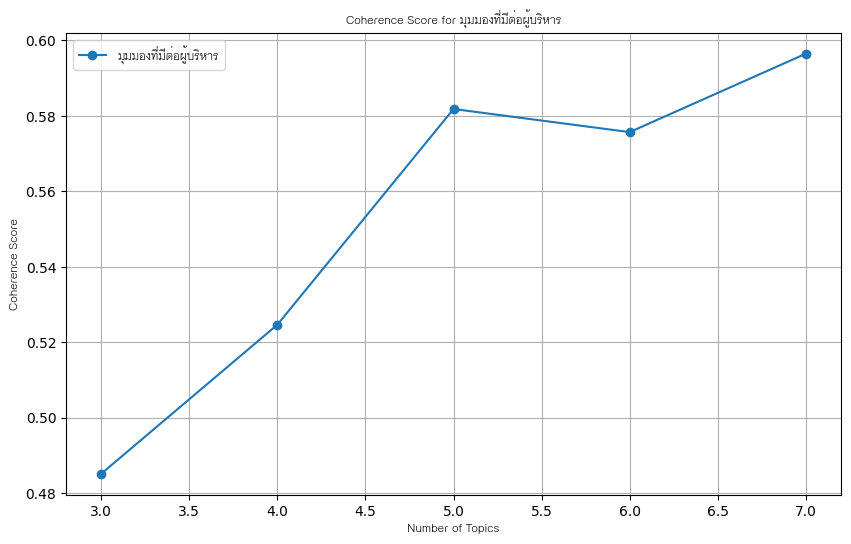


Analyzing Column: tokens_col (มุมมองที่มีต่อเพื่อนร่วมงาน)


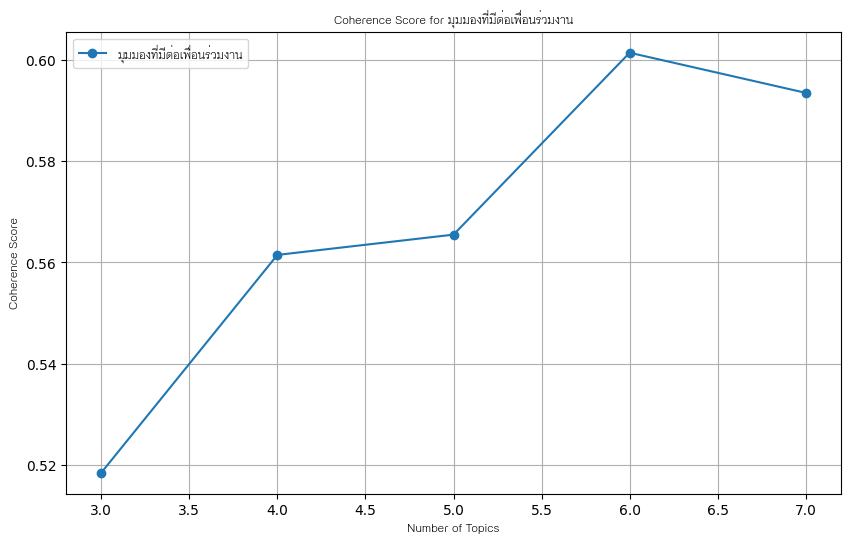


Analyzing Column: tokens_std (มุมมองที่มีต่อนักเรียน)


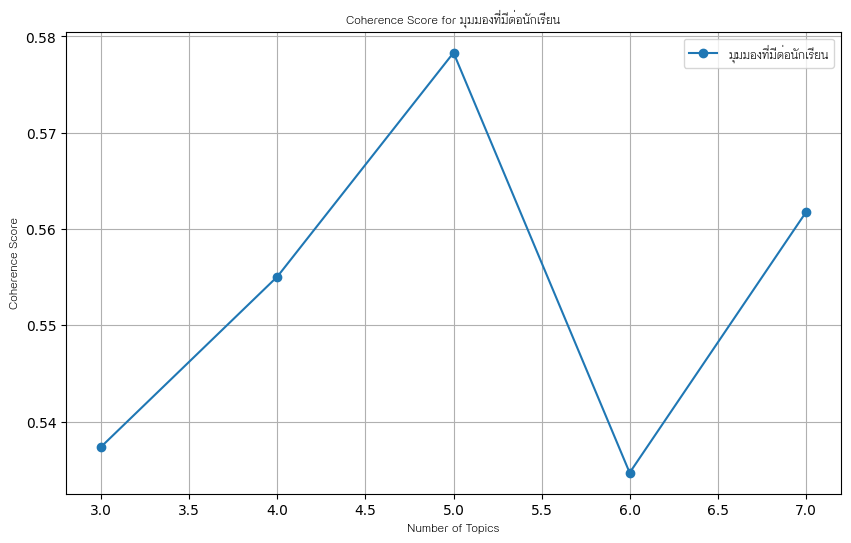


Coherence Score Table:
                         Column  Num_Topics  Coherence_Score
0       มุมมองที่มีต่อผู้บริหาร           3         0.485136
1       มุมมองที่มีต่อผู้บริหาร           4         0.524636
2       มุมมองที่มีต่อผู้บริหาร           5         0.581789
3       มุมมองที่มีต่อผู้บริหาร           6         0.575661
4       มุมมองที่มีต่อผู้บริหาร           7         0.596436
5   มุมมองที่มีต่อเพื่อนร่วมงาน           3         0.518530
6   มุมมองที่มีต่อเพื่อนร่วมงาน           4         0.561494
7   มุมมองที่มีต่อเพื่อนร่วมงาน           5         0.565493
8   มุมมองที่มีต่อเพื่อนร่วมงาน           6         0.601374
9   มุมมองที่มีต่อเพื่อนร่วมงาน           7         0.593455
10       มุมมองที่มีต่อนักเรียน           3         0.537402
11       มุมมองที่มีต่อนักเรียน           4         0.555059
12       มุมมองที่มีต่อนักเรียน           5         0.578298
13       มุมมองที่มีต่อนักเรียน           6         0.534697
14       มุมมองที่มีต่อนักเรียน           7         0.561717


ModuleNotFoundError: No module named 'ace_tools'

In [80]:
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.models import LdaModel
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

# กำหนดฟอนต์ภาษาไทย
font_path = '/content/drive/MyDrive/วิทยานิพนธ์-พีรยา/บทความ/ChulaCharasNewReg.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

# ฟังก์ชันเตรียม Corpus และ Dictionary
def prepare_corpus_and_dictionary(text_series):
    docs = [tokens for tokens in text_series.dropna()]
    dictionary = corpora.Dictionary(docs)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    return corpus, dictionary, docs

# ฟังก์ชันคำนวณ Coherence Score
def compute_coherence(dictionary, corpus, docs, start=2, limit=10, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append((num_topics, coherence_model.get_coherence()))
    return coherence_values

# คอลัมน์ที่ต้องการวิเคราะห์
selected_columns = ["tokens_dir", "tokens_col", "tokens_std"]
column_titles = {
    "tokens_dir": "มุมมองที่มีต่อผู้บริหาร",
    "tokens_col": "มุมมองที่มีต่อเพื่อนร่วมงาน",
    "tokens_std": "มุมมองที่มีต่อนักเรียน"
}

# วิเคราะห์ข้อมูล
coherence_results = []

for column in selected_columns:
    print(f"\nAnalyzing Column: {column} ({column_titles[column]})")

    # เตรียม Corpus และ Dictionary
    corpus, dictionary, docs = prepare_corpus_and_dictionary(df[column])
    if not corpus:
        print(f"No valid documents for column: {column}.")
        continue

    # คำนวณ Coherence Score
    coherence_values = compute_coherence(dictionary, corpus, docs, start=3, limit=8, step=1)

    # เก็บผลลัพธ์ใน DataFrame
    for num_topics, coherence in coherence_values:
        coherence_results.append({
            "Column": column_titles[column],
            "Num_Topics": num_topics,
            "Coherence_Score": coherence
        })

    # แสดง Coherence Score เป็นกราฟ
    x, y = zip(*coherence_values)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', label=column_titles[column])
    plt.xlabel("Number of Topics", fontproperties=font_prop)
    plt.ylabel("Coherence Score", fontproperties=font_prop)
    plt.title(f"Coherence Score for {column_titles[column]}", fontproperties=font_prop)
    plt.legend(prop=font_prop)
    plt.grid()
    plt.show()

# สร้าง DataFrame สำหรับ Coherence Score
coherence_df = pd.DataFrame(coherence_results)

# แสดงตาราง Coherence Score
print("\nCoherence Score Table:")
print(coherence_df)

# แสดงตารางใน Colab
import ace_tools as tools; tools.display_dataframe_to_user(name="Coherence Scores for Columns", dataframe=coherence_df)

# สร้างกราฟเปรียบเทียบ Coherence Scores สำหรับทุกคอลัมน์
plt.figure(figsize=(14, 10))
for column in selected_columns:
    column_data = coherence_df[coherence_df["Column"] == column_titles[column]]
    if not column_data.empty:
        plt.plot(column_data["Num_Topics"], column_data["Coherence_Score"], marker='o', label=column_titles[column])

plt.title("Coherence Scores for Different Perspectives", fontproperties=font_prop)
plt.xlabel("Number of Topics", fontproperties=font_prop)
plt.ylabel("Coherence Score", fontproperties=font_prop)
plt.legend(title="Perspectives", prop=font_prop)
plt.grid()
plt.show()


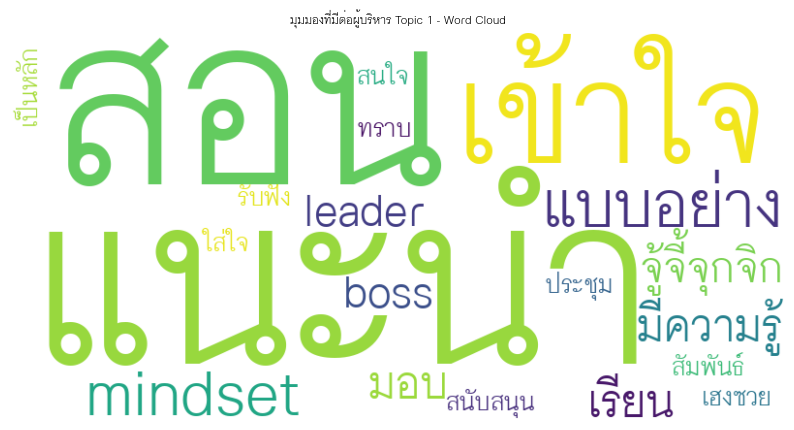

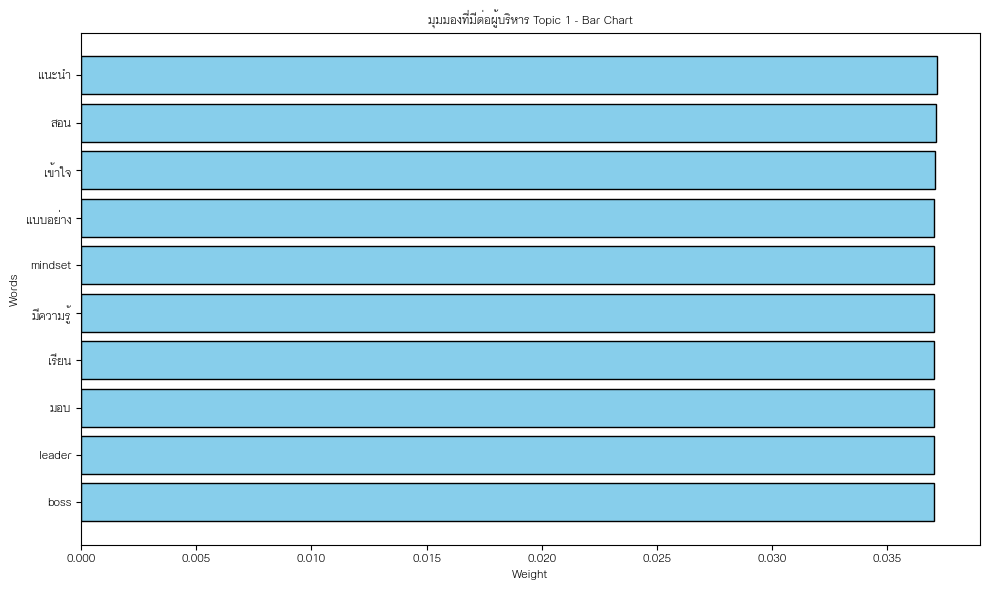

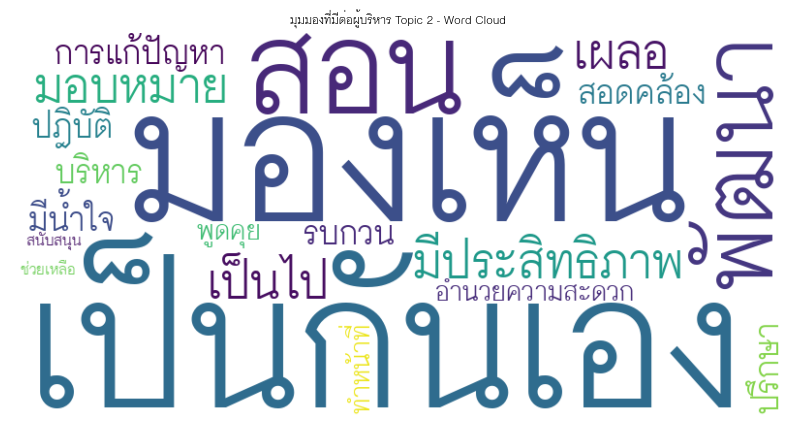

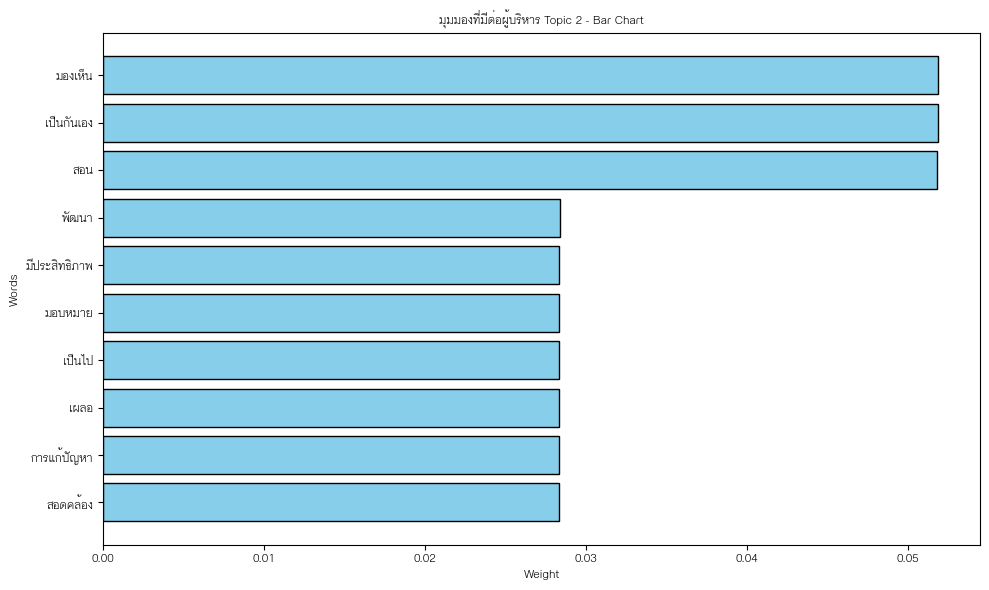

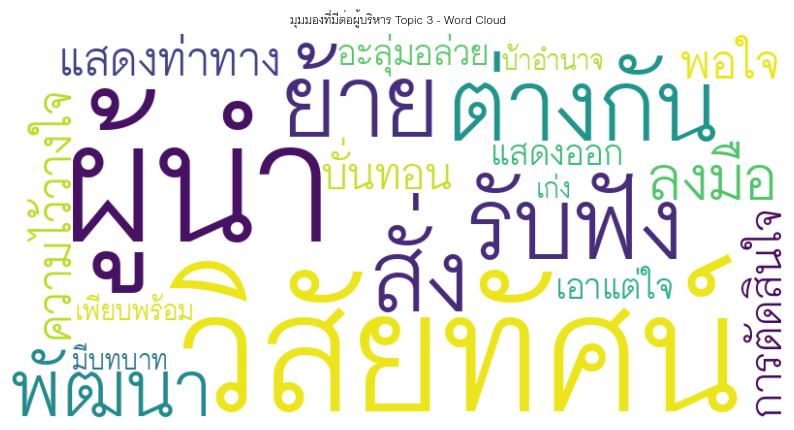

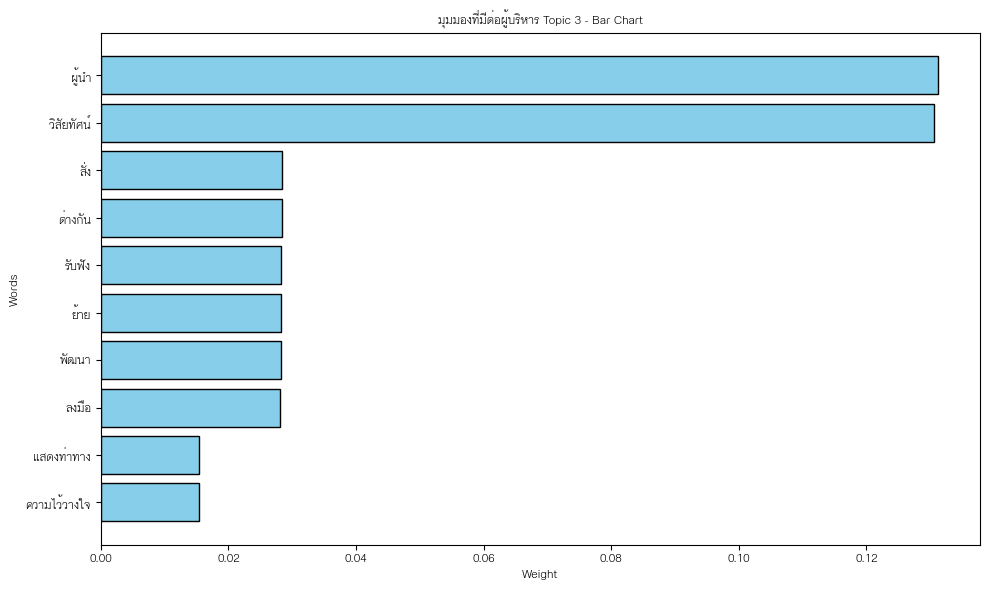

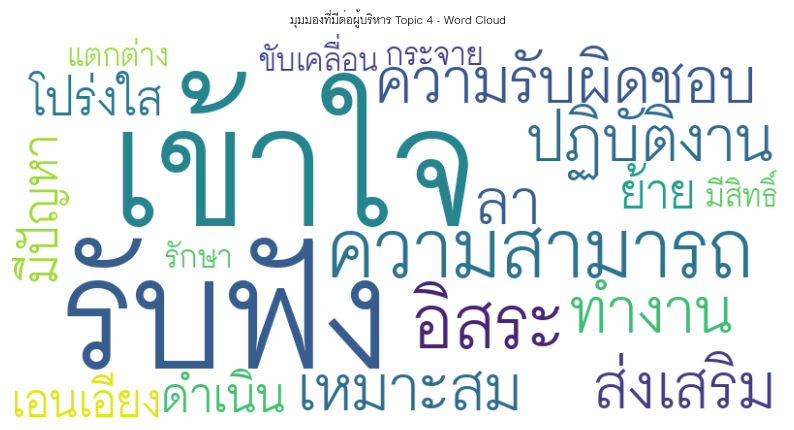

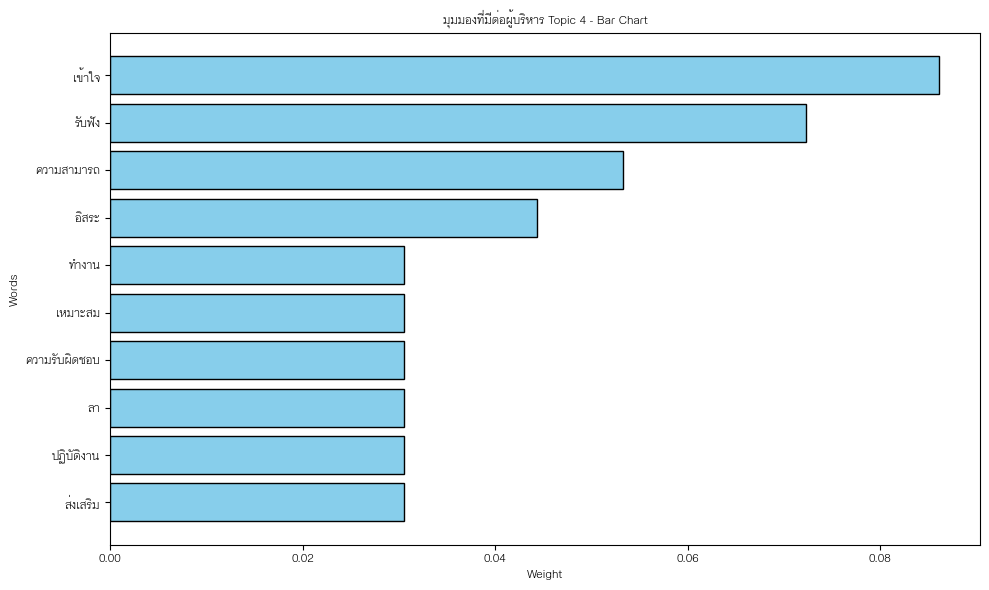

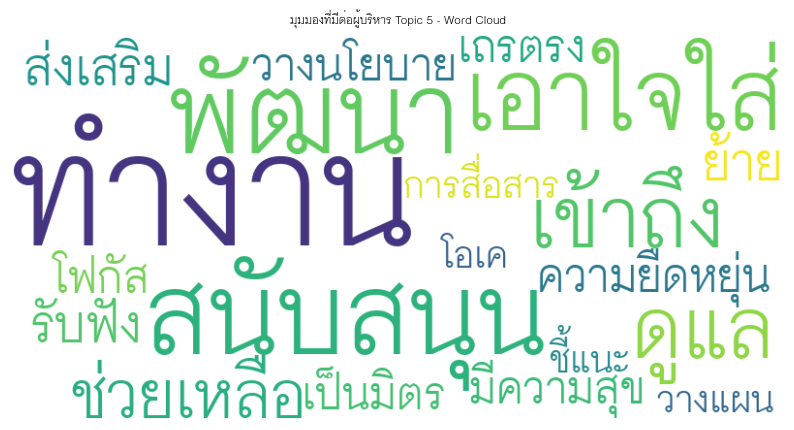

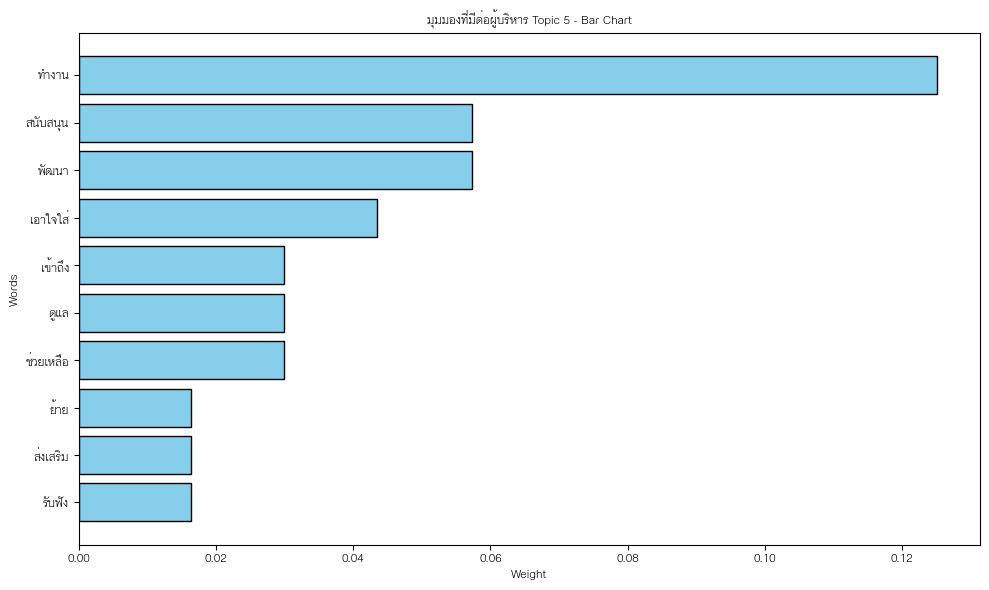

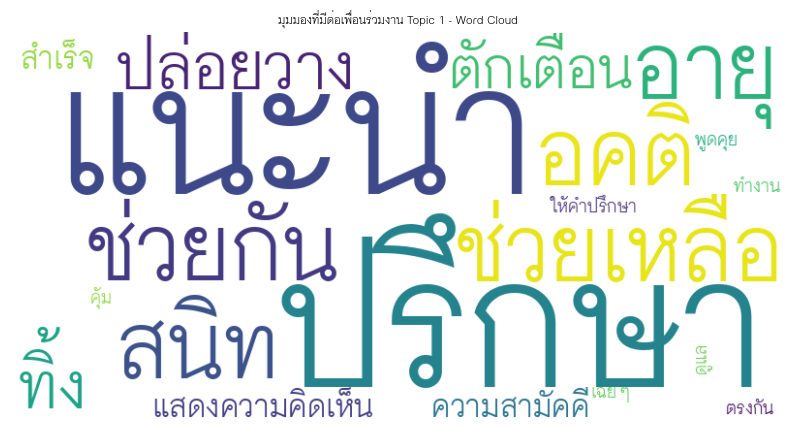

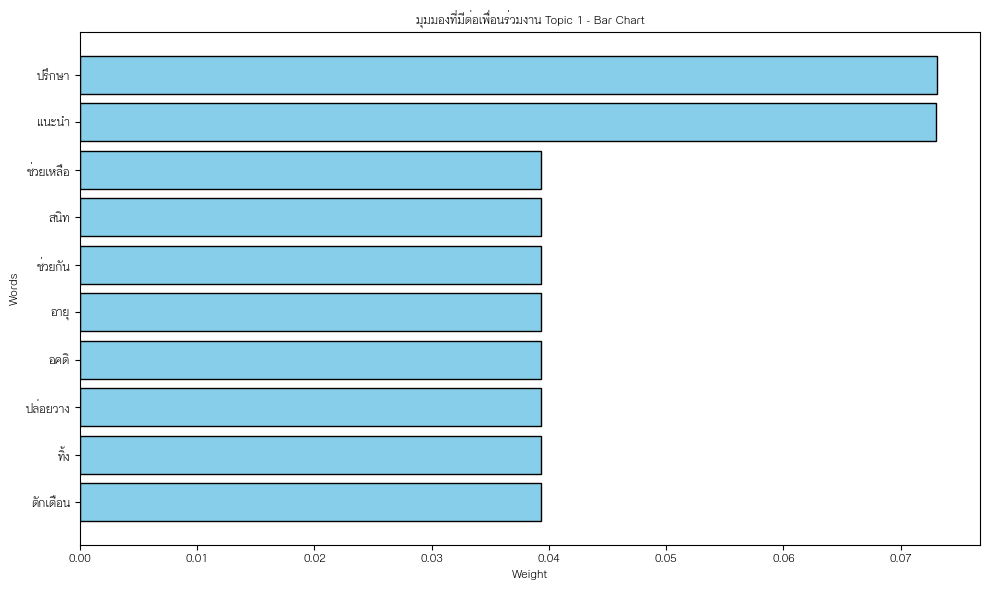

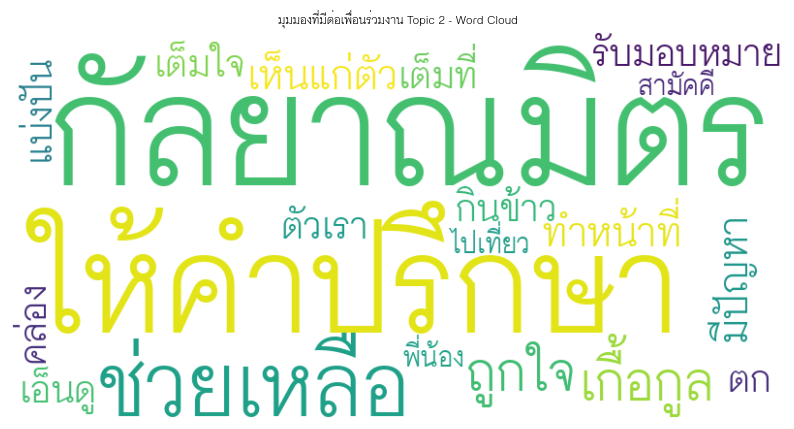

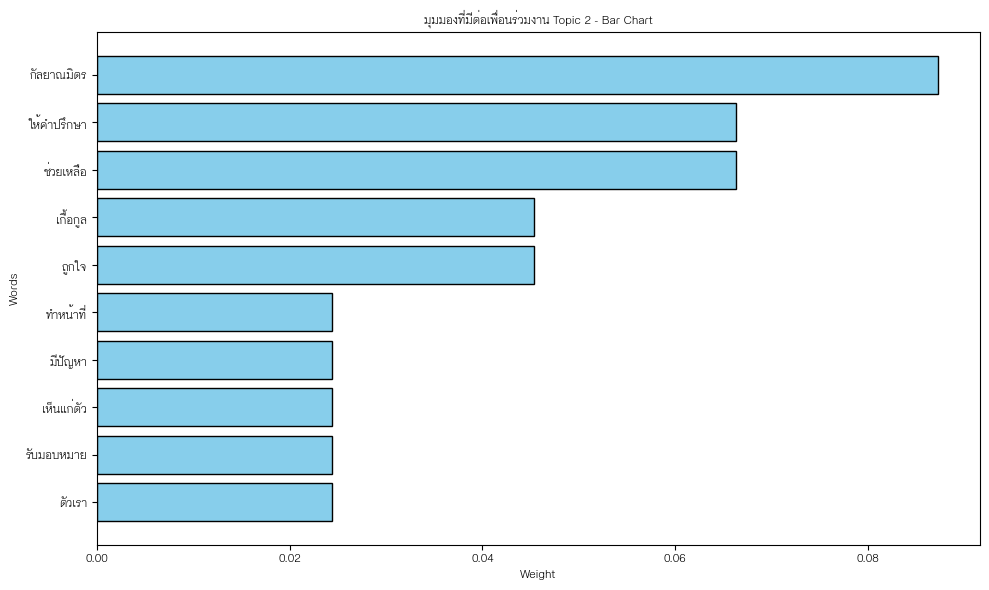

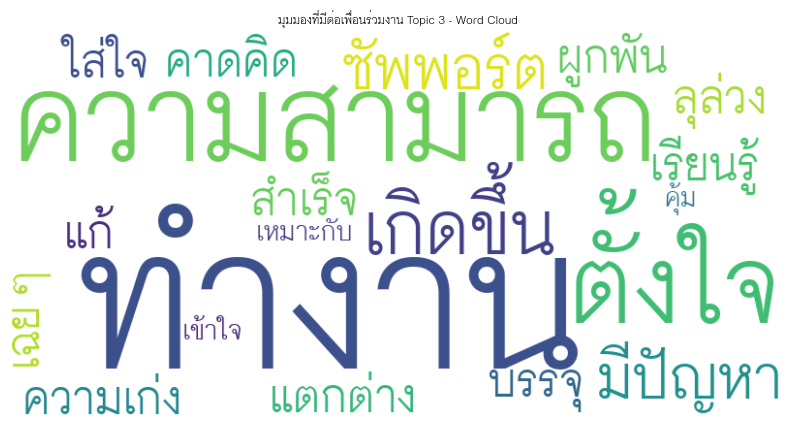

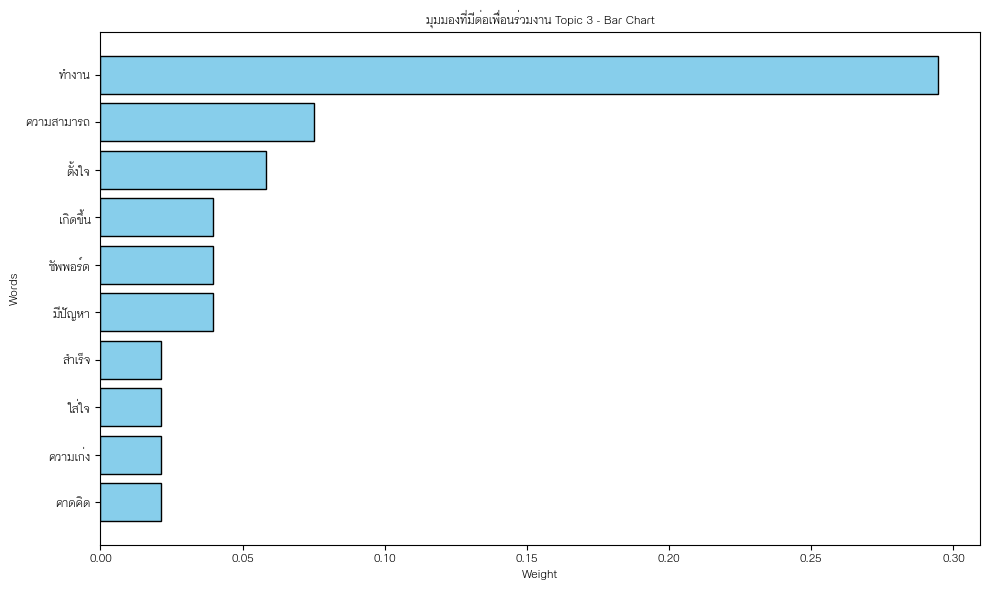

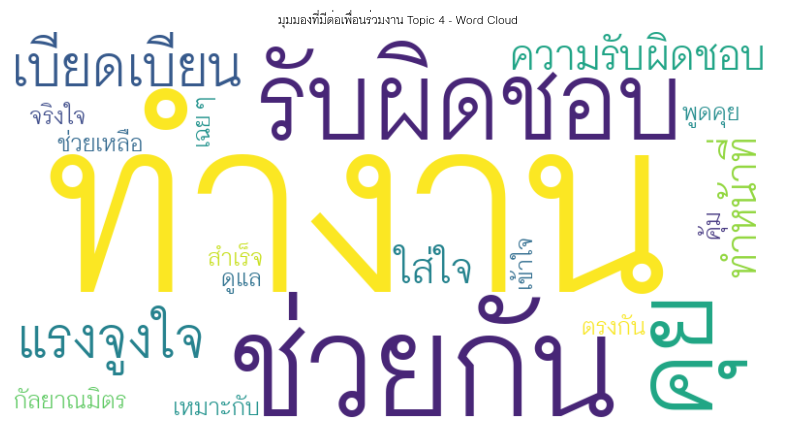

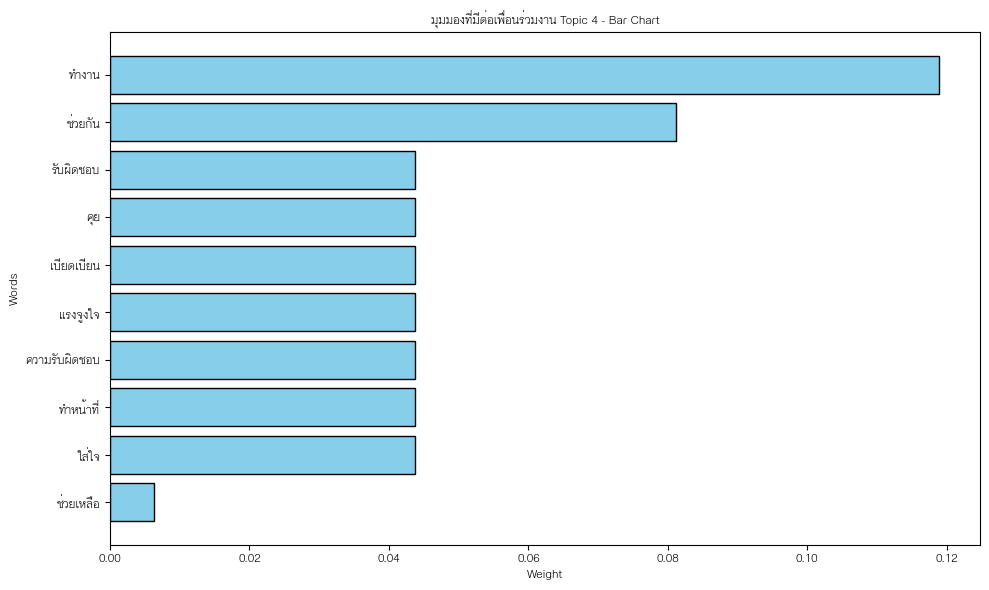

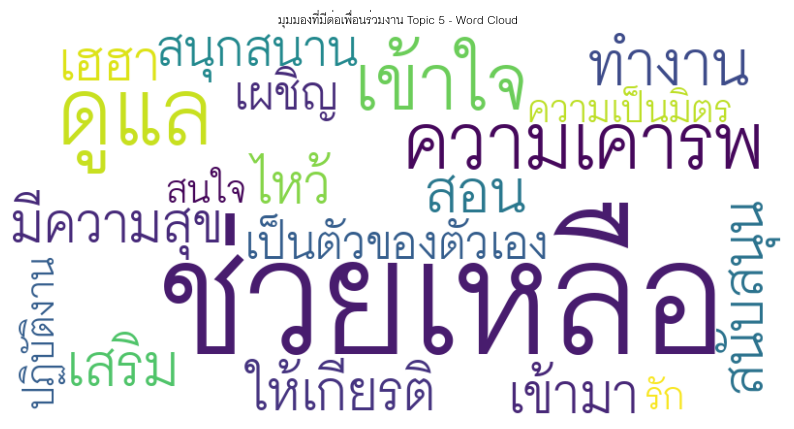

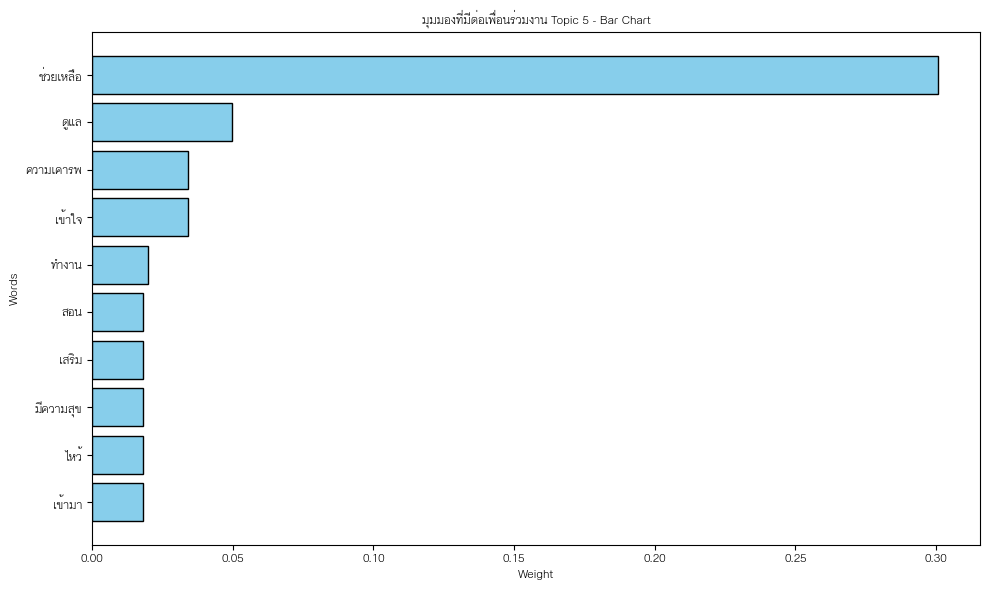

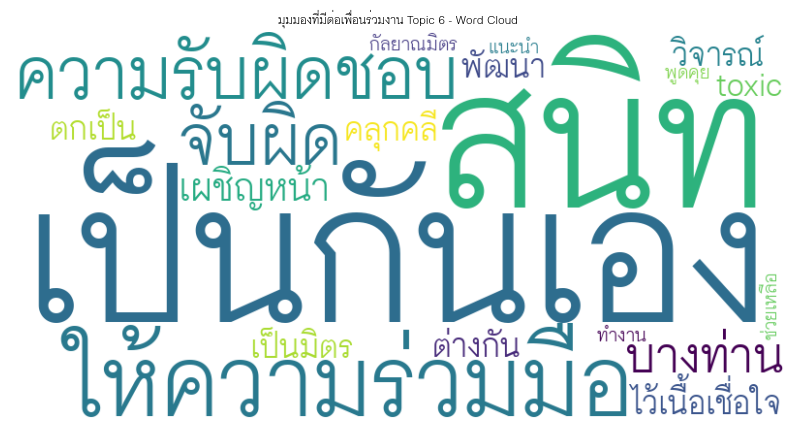

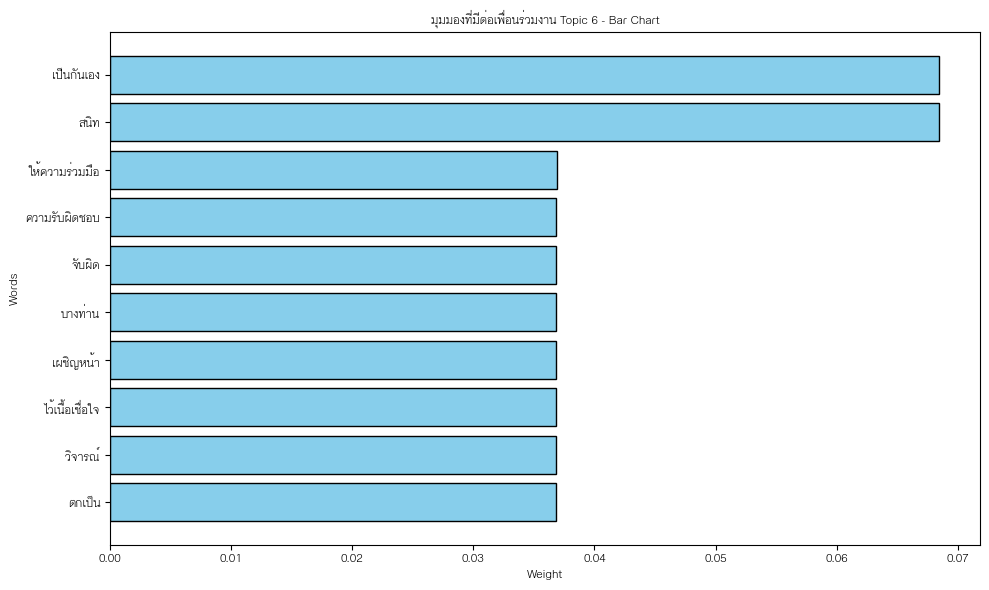

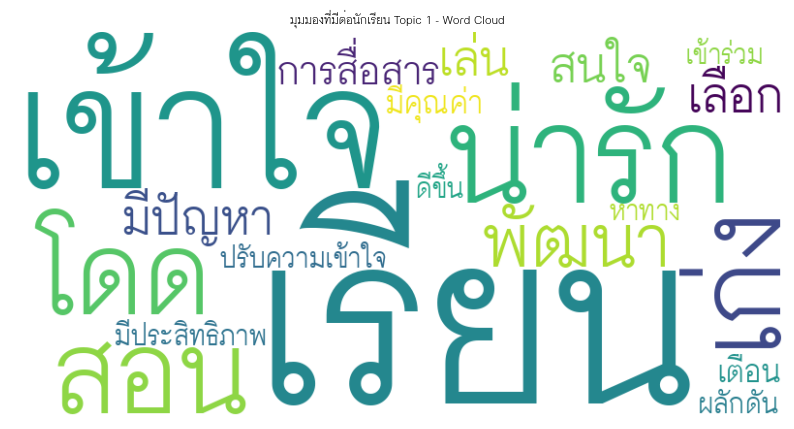

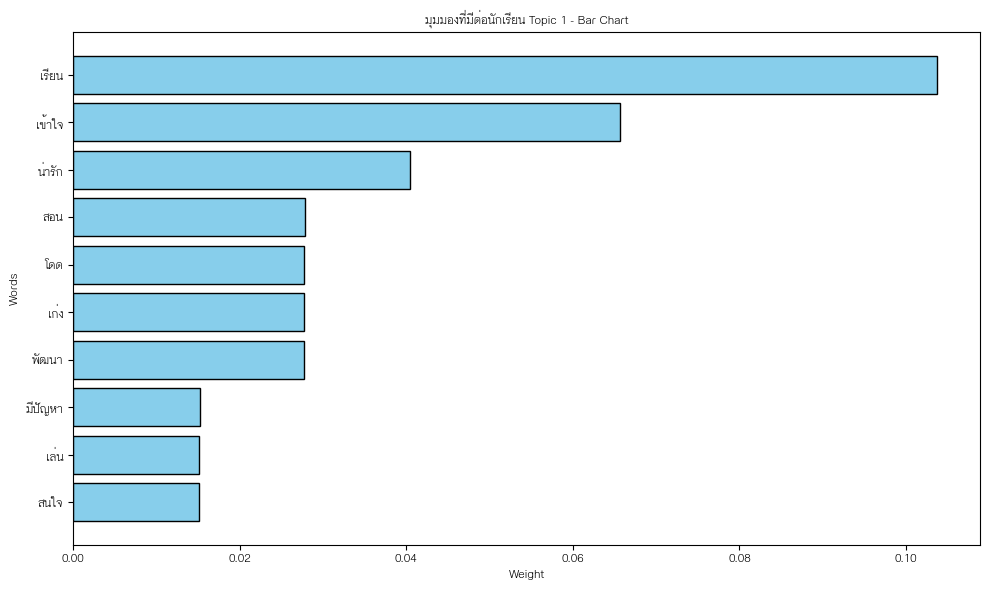

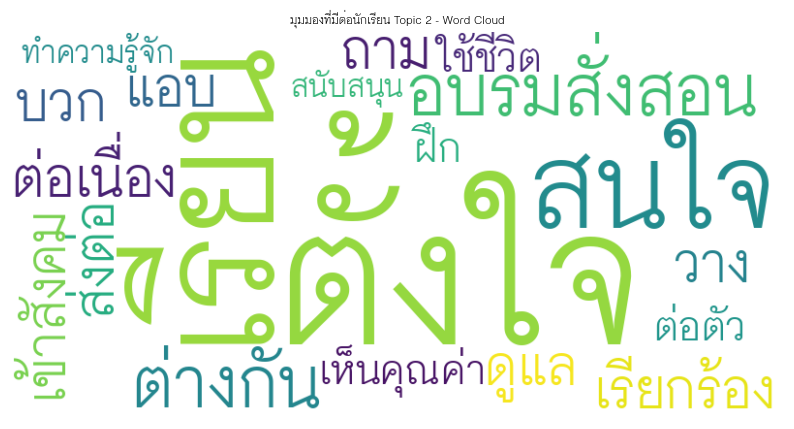

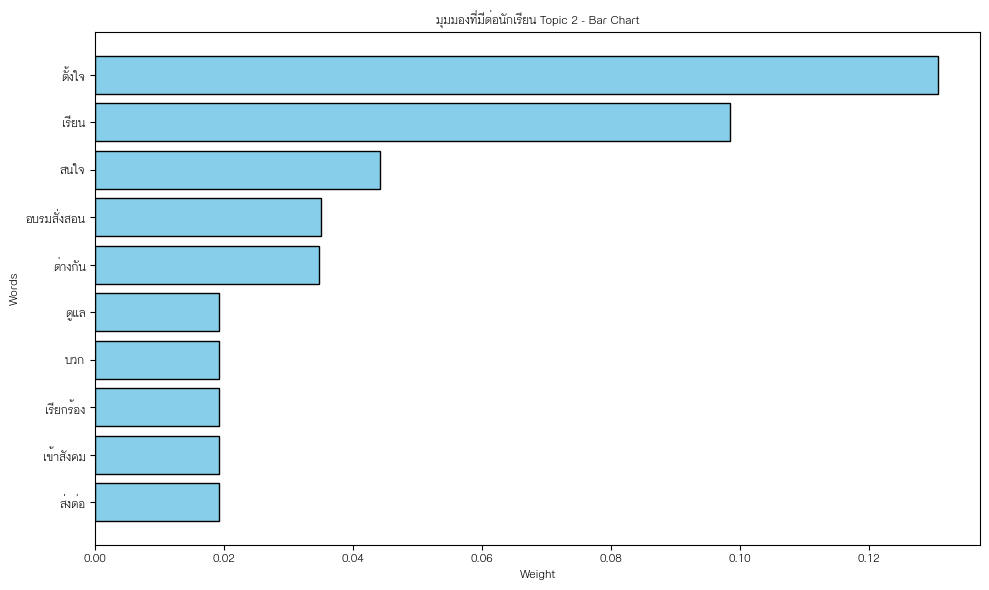

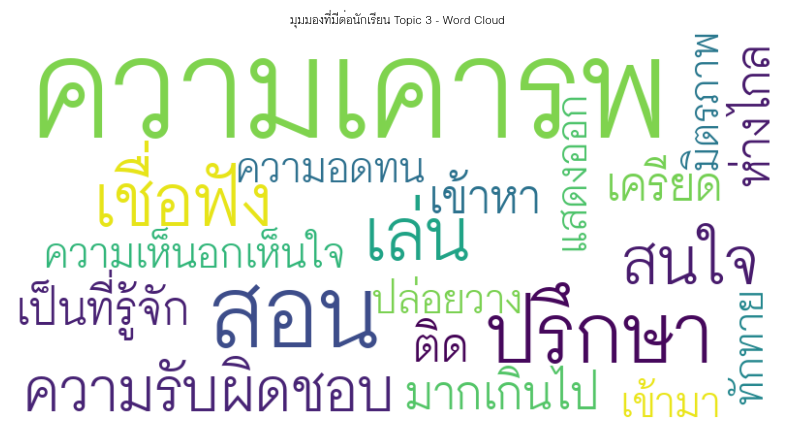

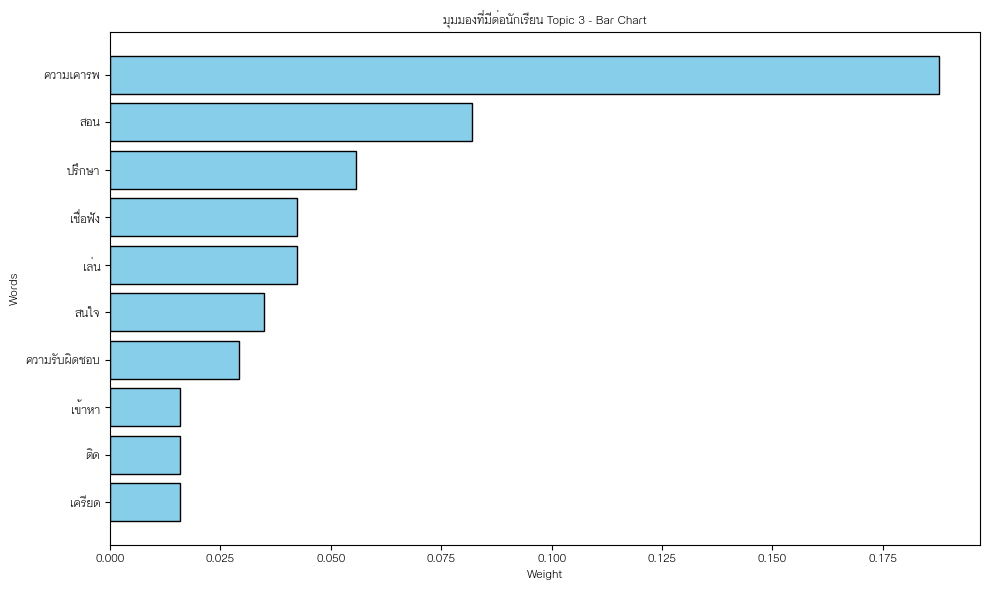

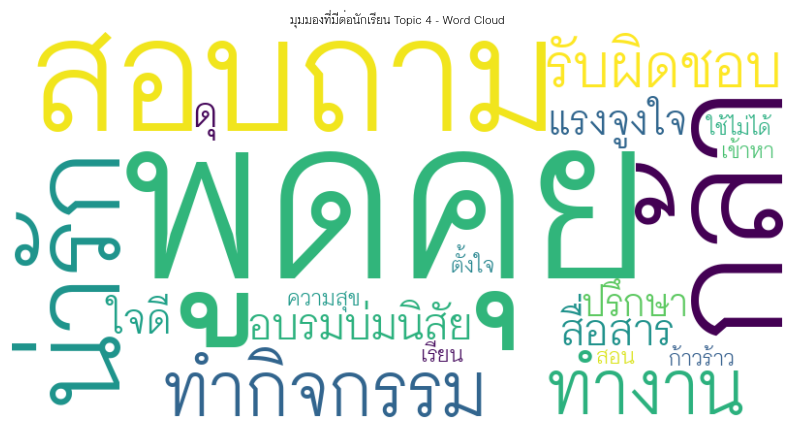

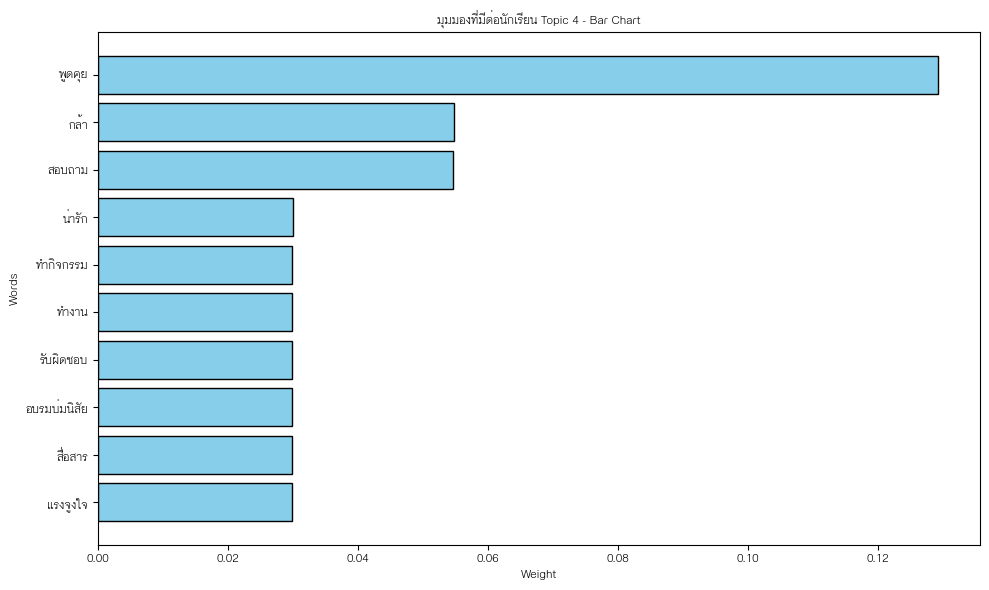

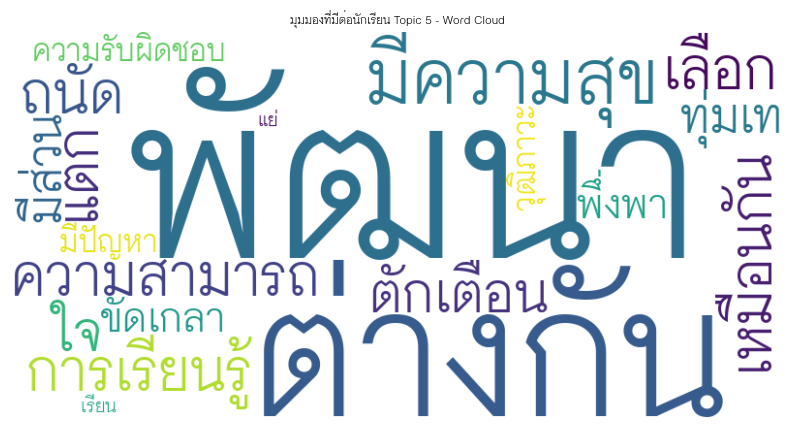

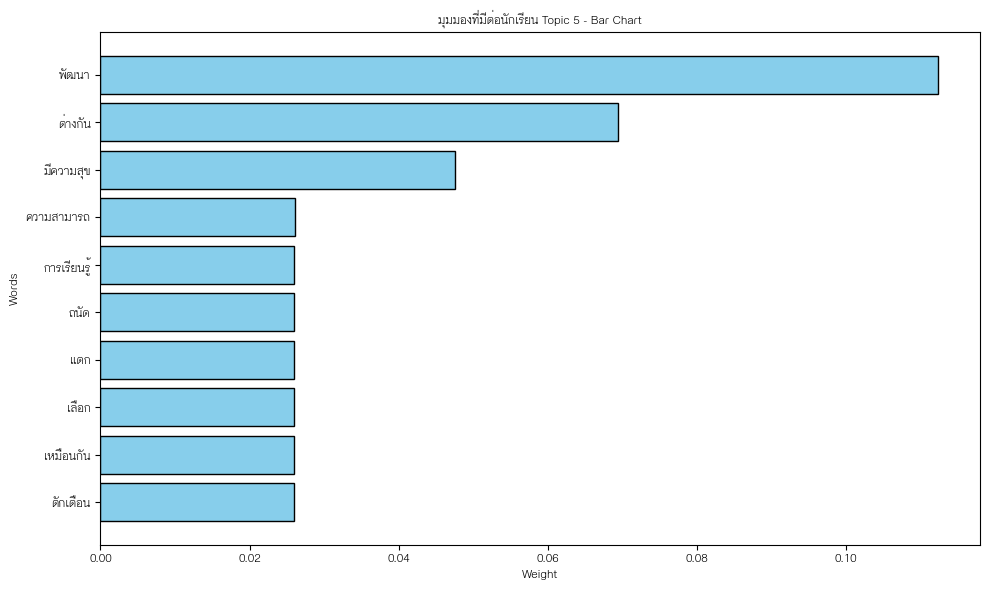

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ฟังก์ชันสร้าง Word Cloud และ Bar Chart
def create_wordcloud_and_barchart_from_lda(lda_model, dictionary, title_prefix=""):
    for topic_id in range(lda_model.num_topics):
        terms = lda_model.get_topic_terms(topic_id, topn=20)
        wordcloud_data = {dictionary[word_id]: weight for word_id, weight in terms}

        # สร้าง Word Cloud
        wordcloud = WordCloud(
            font_path=font_path,
            background_color='white',
            width=800,
            height=400
        ).generate_from_frequencies(wordcloud_data)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{title_prefix} Topic {topic_id + 1} - Word Cloud", fontproperties=font_prop)
        plt.show()

        # สร้าง Bar Chart
        top_words = list(wordcloud_data.keys())[:10]
        top_weights = list(wordcloud_data.values())[:10]

        plt.figure(figsize=(10, 6))
        plt.barh(top_words, top_weights, color='skyblue', edgecolor='black')
        plt.gca().invert_yaxis()  # ทำให้คำเรียงลำดับจากบนลงล่าง
        plt.xlabel("Weight", fontproperties=font_prop)
        plt.ylabel("Words", fontproperties=font_prop)
        plt.title(f"{title_prefix} Topic {topic_id + 1} - Bar Chart", fontproperties=font_prop)
        plt.xticks(fontproperties=font_prop)
        plt.yticks(fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# เลือกจำนวน Topics สำหรับแต่ละคอลัมน์
custom_num_topics = {
    "tokens_dir": 5,  # ระบุจำนวน topics สำหรับ "มุมมองที่มีต่อผู้บริหาร"
    "tokens_col": 6,  # ระบุจำนวน topics สำหรับ "มุมมองที่มีต่อเพื่อนร่วมงาน"
    "tokens_std": 5   # ระบุจำนวน topics สำหรับ "มุมมองที่มีต่อนักเรียน"
}

# วิเคราะห์ข้อมูลในแต่ละคอลัมน์
for column in selected_columns:
    # ดึงจำนวน topics ที่กำหนดสำหรับคอลัมน์นั้น
    num_topics = custom_num_topics[column]

    # สร้าง Corpus และ Dictionary สำหรับคอลัมน์นั้น
    corpus, dictionary, docs = prepare_corpus_and_dictionary(df[column])

    # สร้าง LDA Model ด้วยจำนวน topics ที่ระบุ
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

    # สร้าง Word Cloud และ Bar Chart
    create_wordcloud_and_barchart_from_lda(lda_model, dictionary, title_prefix=column_titles[column])


แยก current teach

Using font: ChulaCharasNew

Analyzing Group: ยังประกอบอาชีพครูอยู่, Column: tokens_dir
Calculating Coherence Score for ยังประกอบอาชีพครูอยู่, Column: tokens_dir...


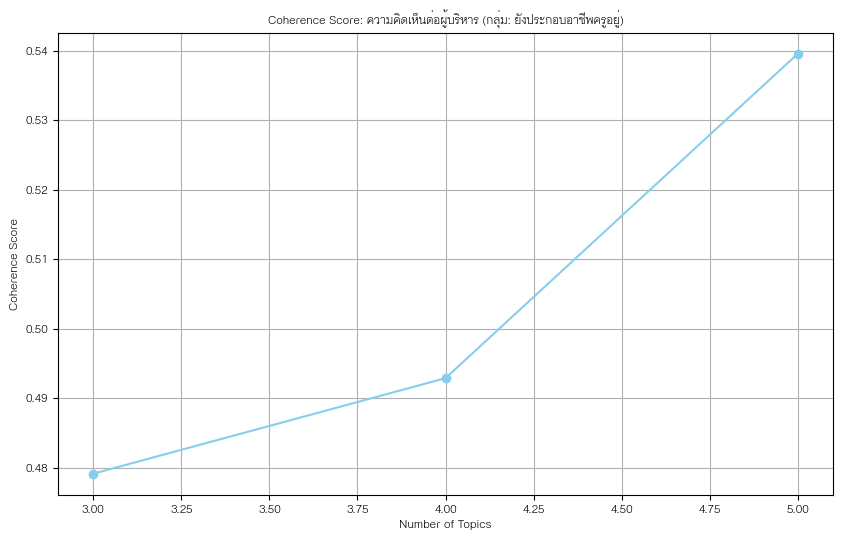

Optimal number of topics for ยังประกอบอาชีพครูอยู่, Column: tokens_dir: 5

Analyzing Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_dir
Calculating Coherence Score for ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_dir...


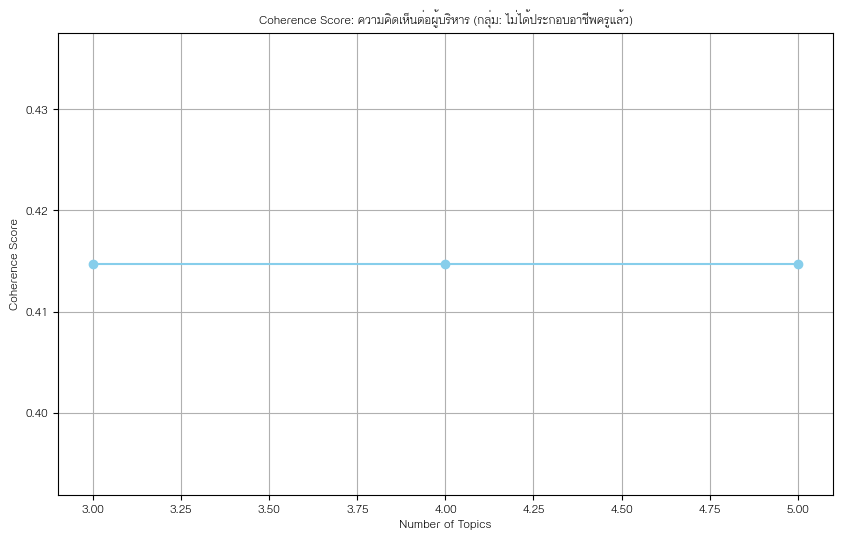

Optimal number of topics for ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_dir: 3

Analyzing Group: ยังประกอบอาชีพครูอยู่, Column: tokens_col
Calculating Coherence Score for ยังประกอบอาชีพครูอยู่, Column: tokens_col...


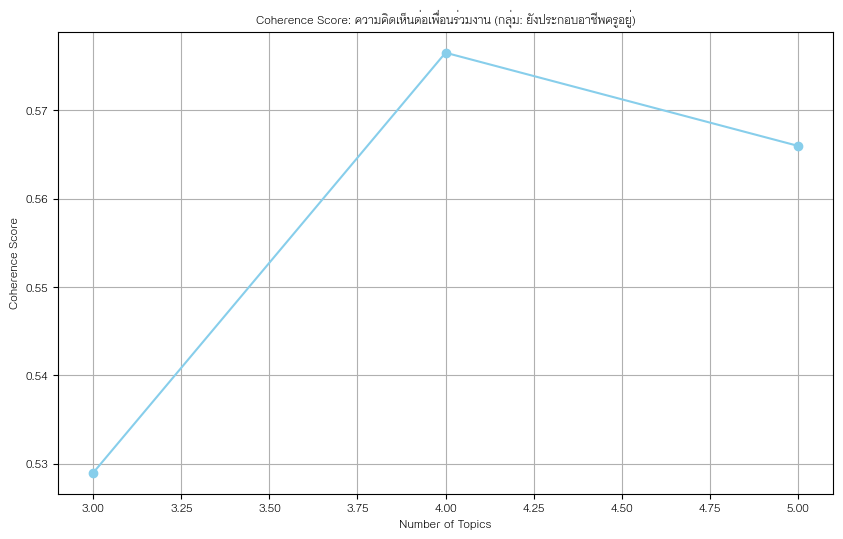

Optimal number of topics for ยังประกอบอาชีพครูอยู่, Column: tokens_col: 4

Analyzing Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_col
Calculating Coherence Score for ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_col...


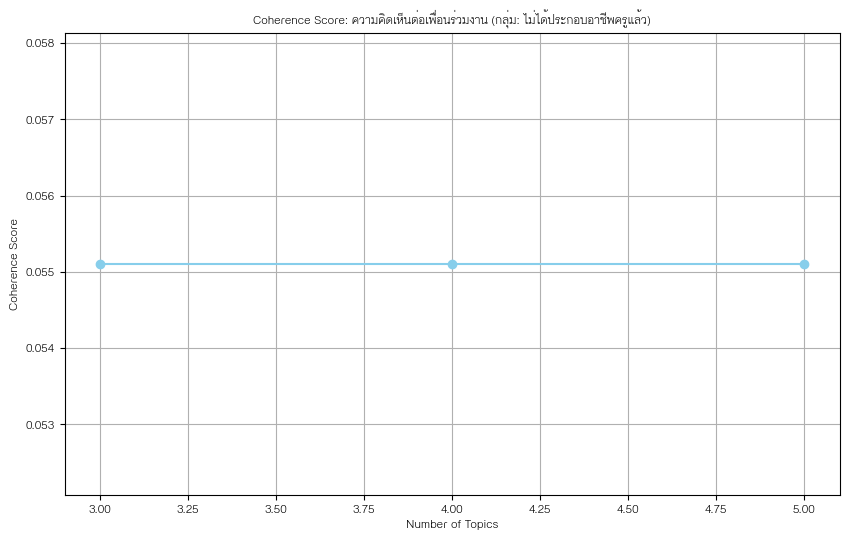

Optimal number of topics for ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_col: 3

Analyzing Group: ยังประกอบอาชีพครูอยู่, Column: tokens_std
Calculating Coherence Score for ยังประกอบอาชีพครูอยู่, Column: tokens_std...


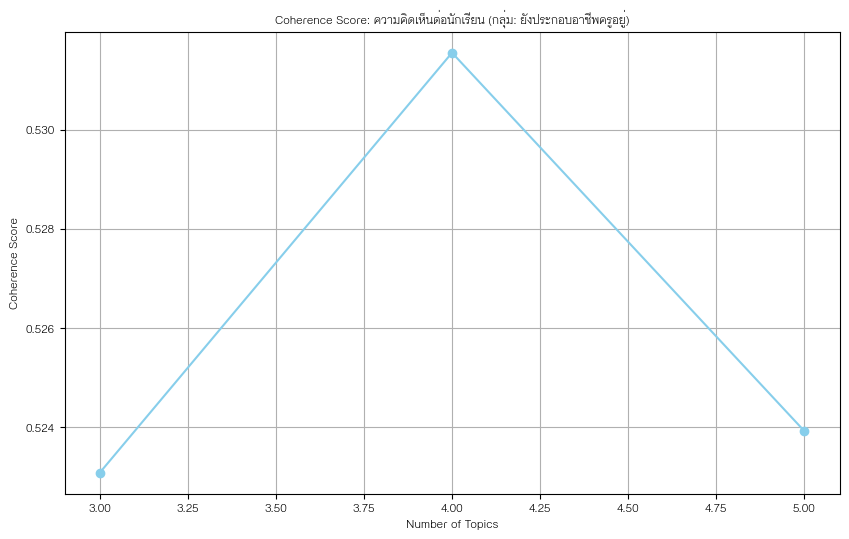

Optimal number of topics for ยังประกอบอาชีพครูอยู่, Column: tokens_std: 4

Analyzing Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_std
Calculating Coherence Score for ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_std...


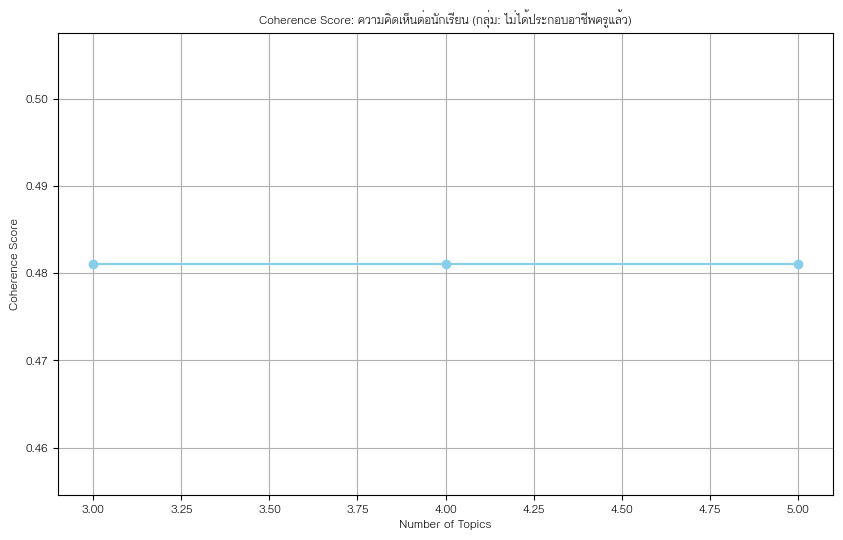

Optimal number of topics for ไม่ได้ประกอบอาชีพครูแล้ว, Column: tokens_std: 5

Optimal Number of Topics for Each Group and Column:
Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อผู้บริหาร -> Num Topics: 5
Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อผู้บริหาร -> Num Topics: 3
Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อเพื่อนร่วมงาน -> Num Topics: 4
Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อเพื่อนร่วมงาน -> Num Topics: 3
Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อนักเรียน -> Num Topics: 4
Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อนักเรียน -> Num Topics: 5


In [6]:
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# กำหนดฟอนต์ภาษาไทย
font_path = '/content/drive/MyDrive/วิทยานิพนธ์-พีรยา/บทความ/ChulaCharasNewReg.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

# ตรวจสอบชื่อฟอนต์ที่โหลด
print(f"Using font: {font_prop.get_name()}")

rc('font', family=font_prop.get_name())

# ฟังก์ชันเตรียม Corpus และ Dictionary
def prepare_corpus_and_dictionary(token_series):
    docs = token_series.dropna().tolist()
    if not docs:
        return None, None, []

    dictionary = corpora.Dictionary(docs)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    return corpus, dictionary, docs

# ฟังก์ชันคำนวณ Coherence Score
def compute_coherence(dictionary, corpus, docs, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)
        model_list.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append((num_topics, coherence_model.get_coherence()))
    return model_list, coherence_values

# ฟังก์ชันแสดง Coherence Score
def plot_coherence(coherence_values, title="Coherence Score by Number of Topics"):
    x, y = zip(*coherence_values)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', color='skyblue')
    plt.xlabel("Number of Topics", fontproperties=font_prop)
    plt.ylabel("Coherence Score", fontproperties=font_prop)
    plt.title(title, fontproperties=font_prop)
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)
    plt.grid()
    plt.show()

# ฟังก์ชันหา num_topics ที่เหมาะสมที่สุด
def find_optimal_num_topics(coherence_values):
    return max(coherence_values, key=lambda x: x[1])[0]

# แยกข้อมูลตาม current_teach และคอลัมน์ที่สนใจ
grouped_data = df.groupby("current_teach")
selected_columns = ["tokens_dir", "tokens_col", "tokens_std"]
column_titles = {
    "tokens_dir": "ความคิดเห็นต่อผู้บริหาร",
    "tokens_col": "ความคิดเห็นต่อเพื่อนร่วมงาน",
    "tokens_std": "ความคิดเห็นต่อนักเรียน"
}

# วิเคราะห์ข้อมูล
optimal_topics = {}
for column in selected_columns:
    for group_name, group_df in grouped_data:
        print(f"\nAnalyzing Group: {group_name}, Column: {column}")

        corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
        if not corpus:
            print(f"No valid documents for group {group_name}, column {column}.")
            continue

        print(f"Calculating Coherence Score for {group_name}, Column: {column}...")
        _, coherence_values = compute_coherence(dictionary, corpus, docs, start=3, limit=6, step=1)

        plot_coherence(coherence_values, title=f"Coherence Score: {column_titles[column]} (กลุ่ม: {group_name})")

        best_num_topics = find_optimal_num_topics(coherence_values)
        optimal_topics[(group_name, column)] = best_num_topics
        print(f"Optimal number of topics for {group_name}, Column: {column}: {best_num_topics}")

# แสดงผลลัพธ์ num_topics ที่เหมาะสมที่สุด
print("\nOptimal Number of Topics for Each Group and Column:")
for key, value in optimal_topics.items():
    print(f"Group: {key[0]}, Column: {column_titles[key[1]]} -> Num Topics: {value}")



Creating Word Cloud and Bar Chart for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อผู้บริหาร


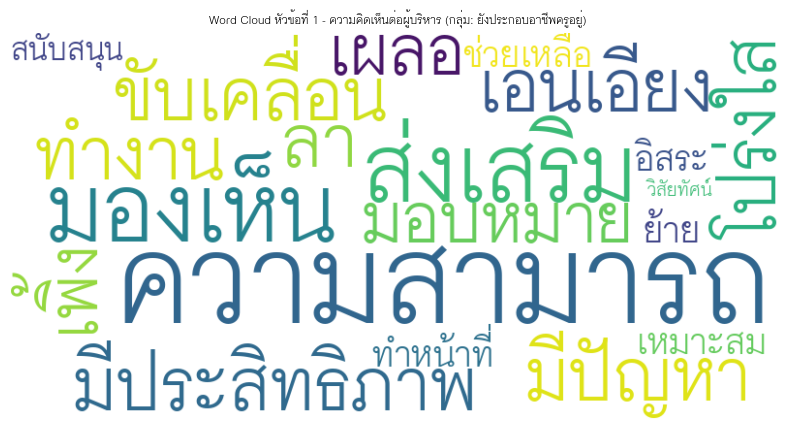

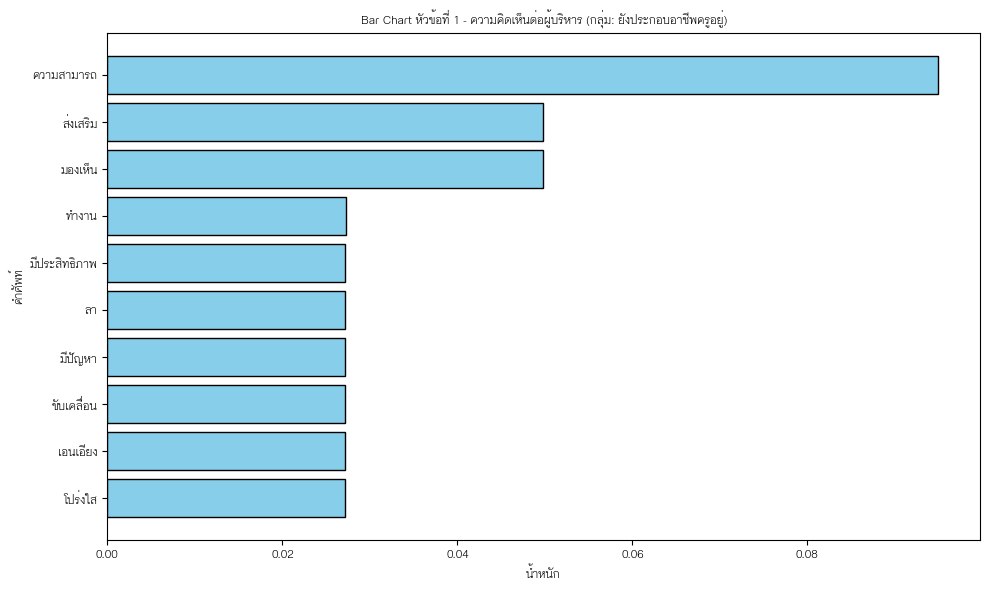

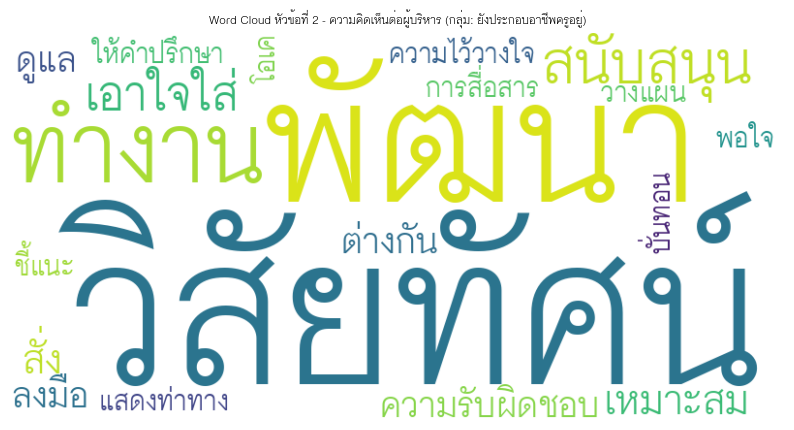

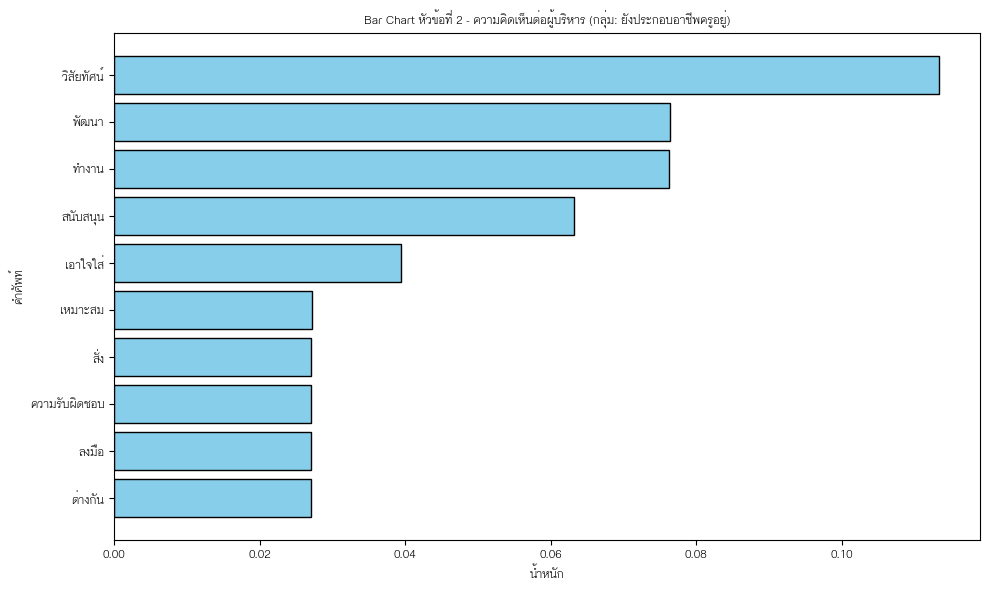

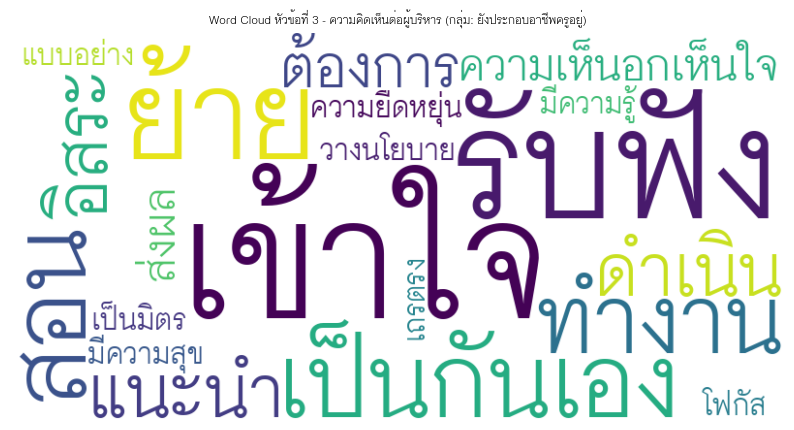

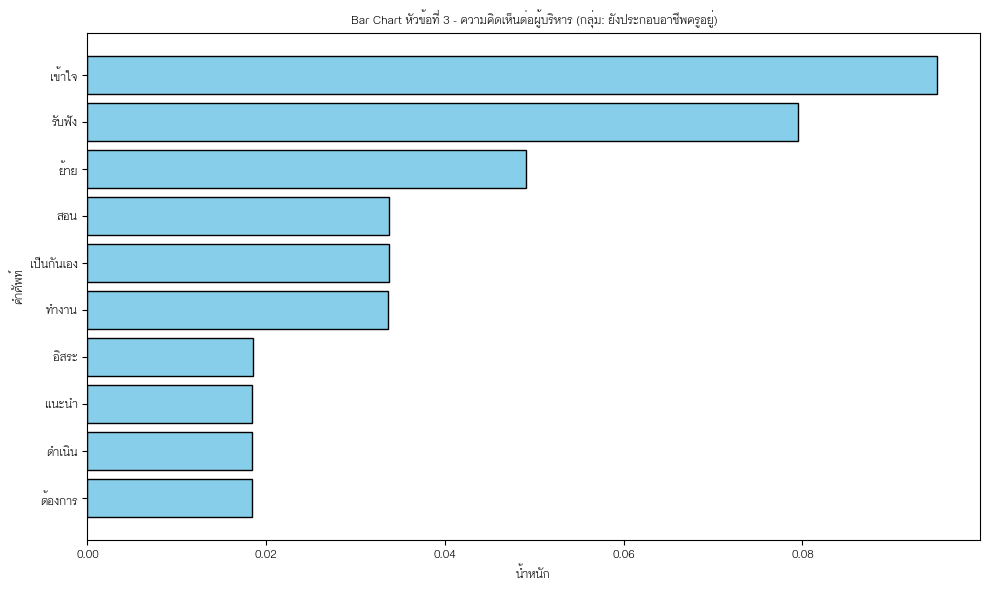

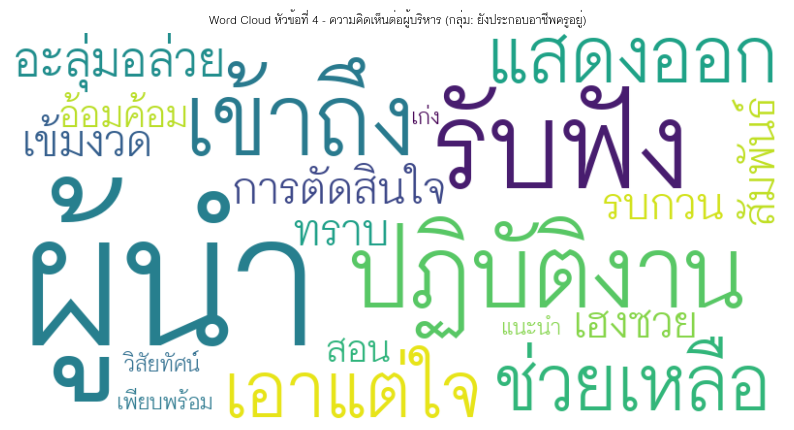

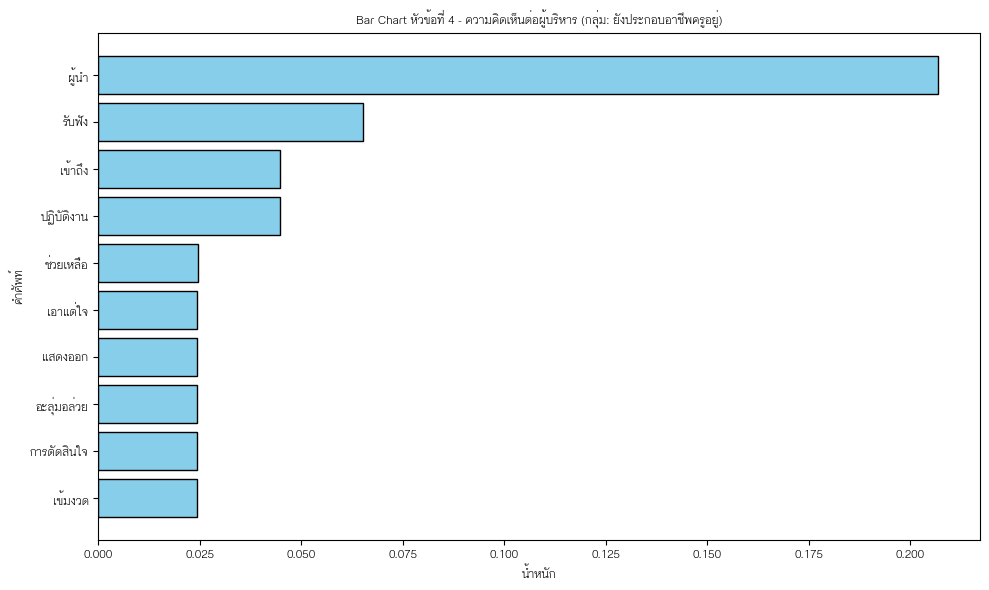

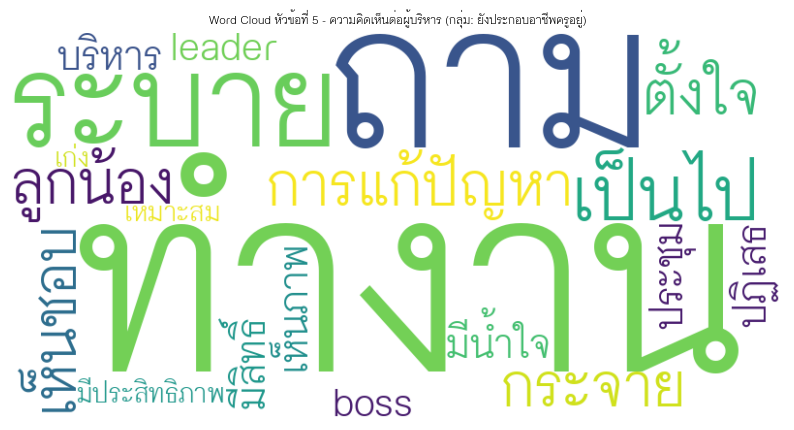

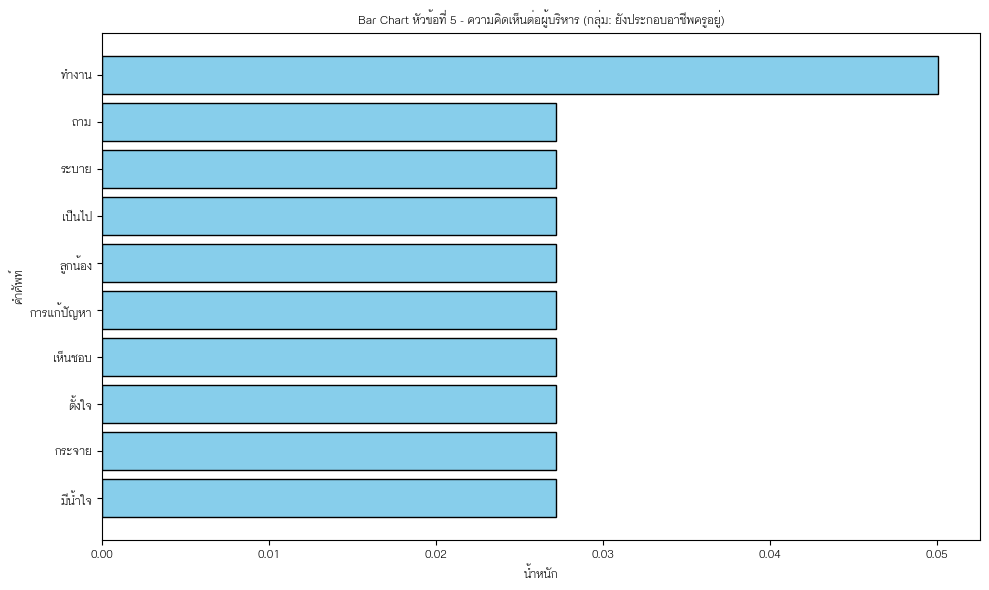


Creating Word Cloud and Bar Chart for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อผู้บริหาร


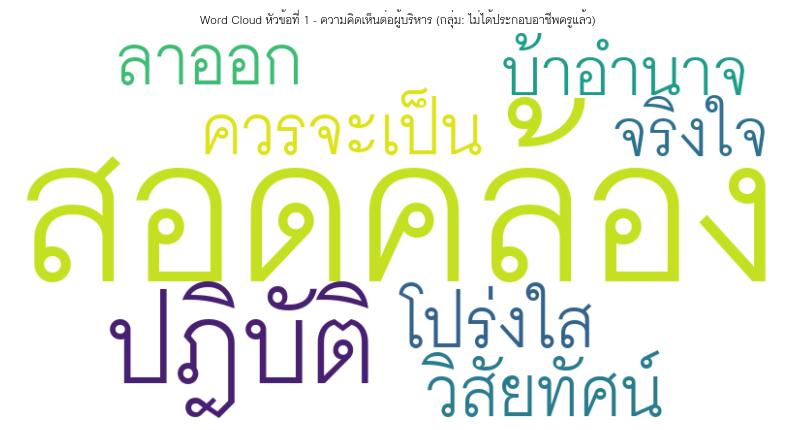

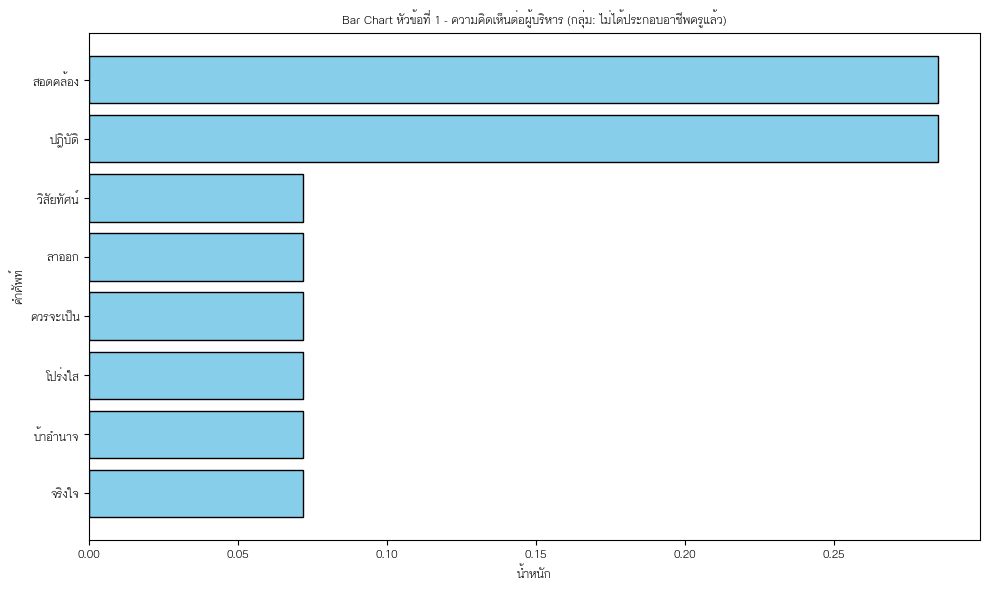

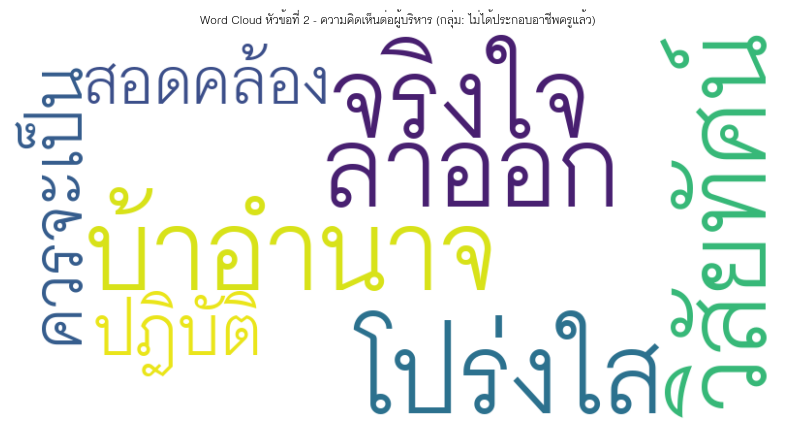

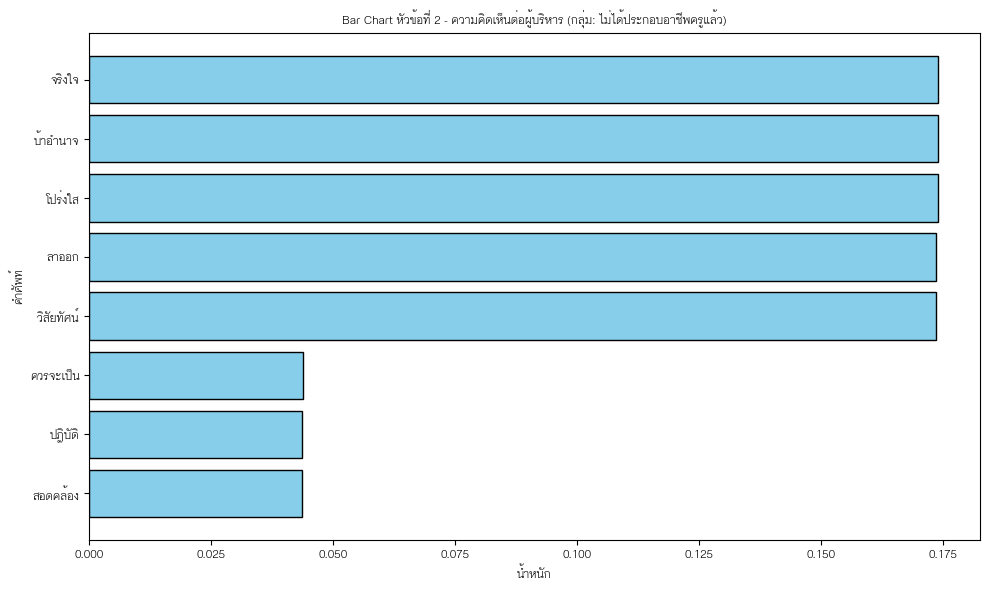

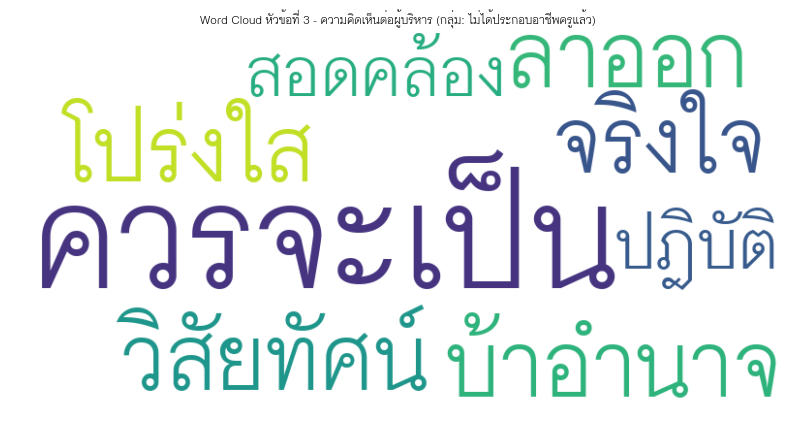

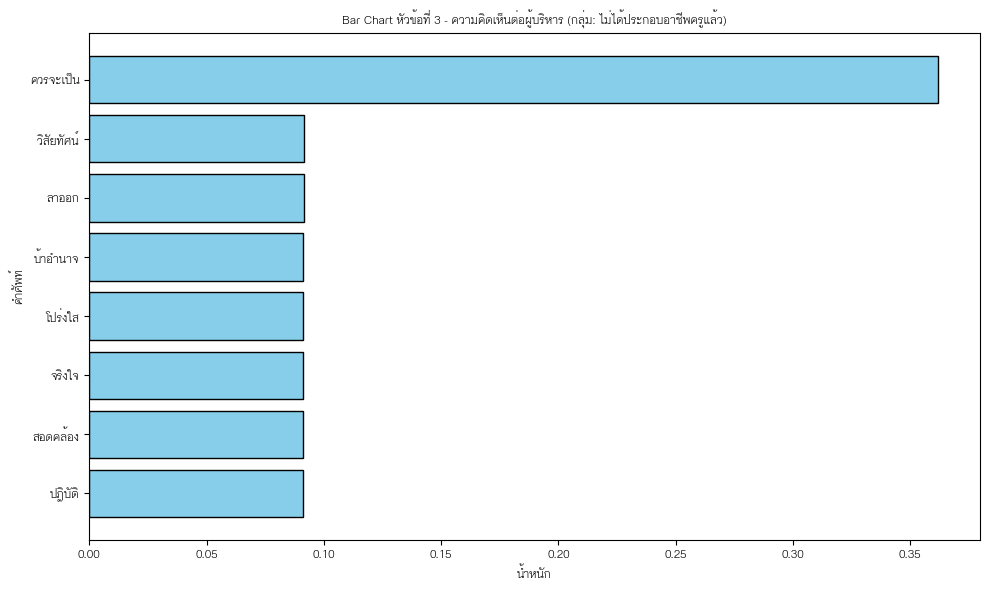


Creating Word Cloud and Bar Chart for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อเพื่อนร่วมงาน


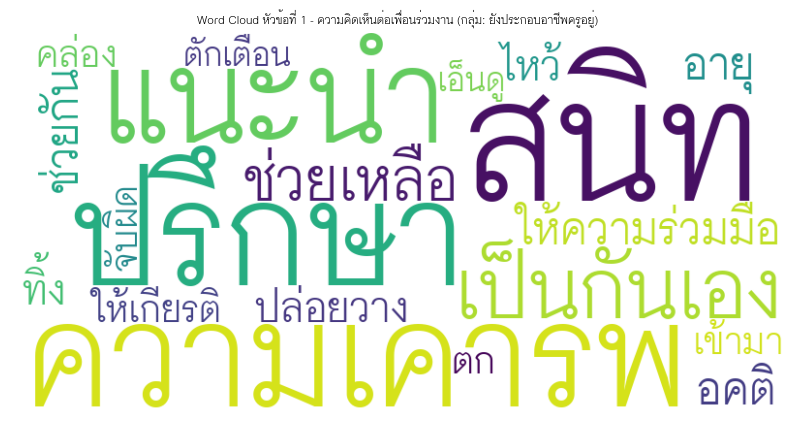

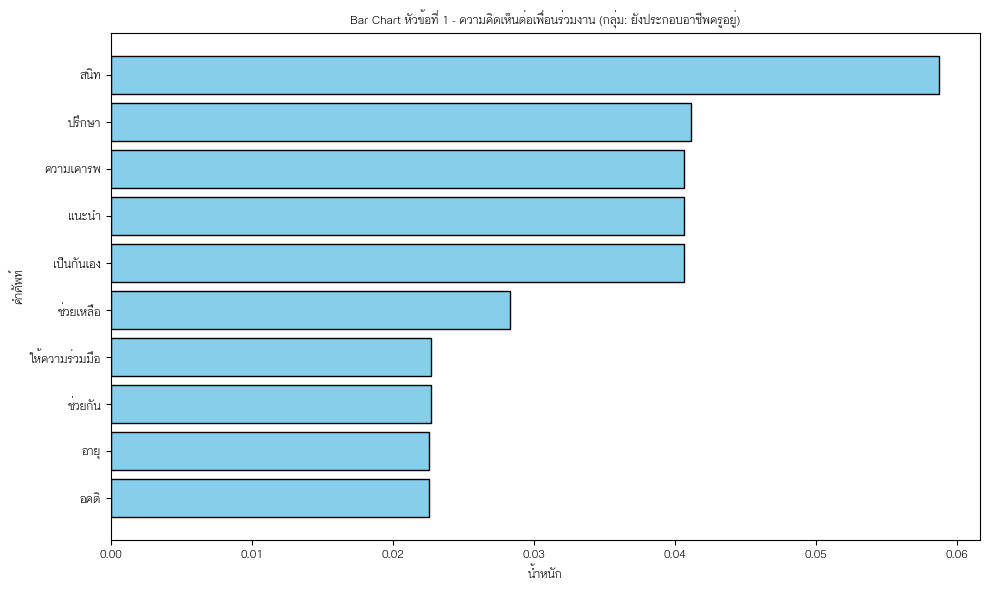

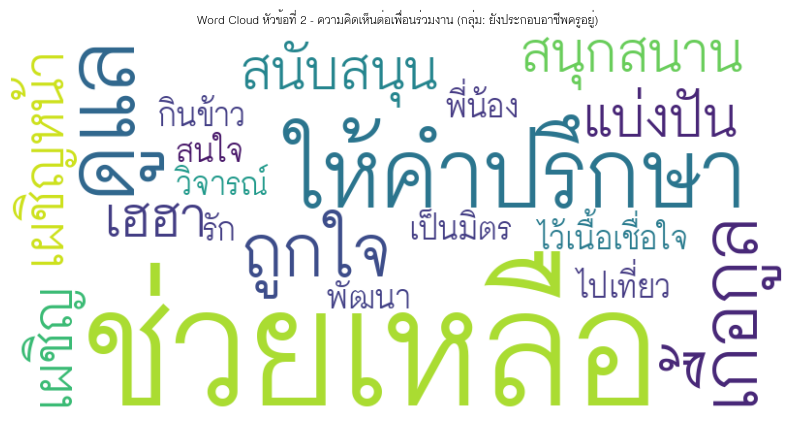

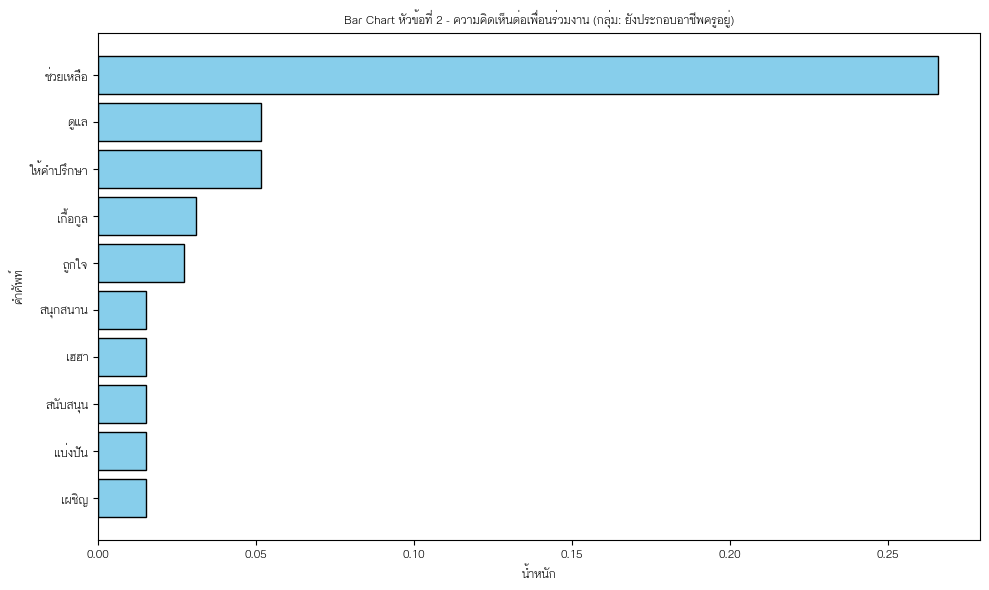

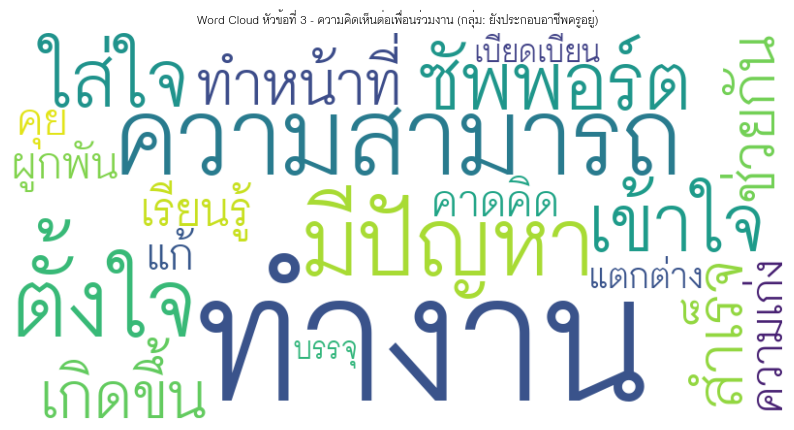

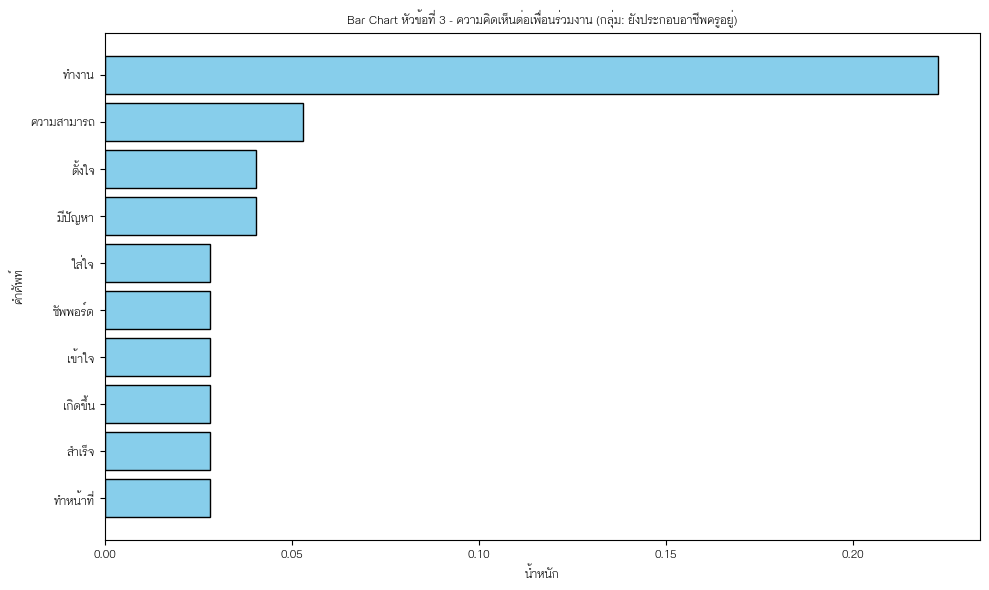

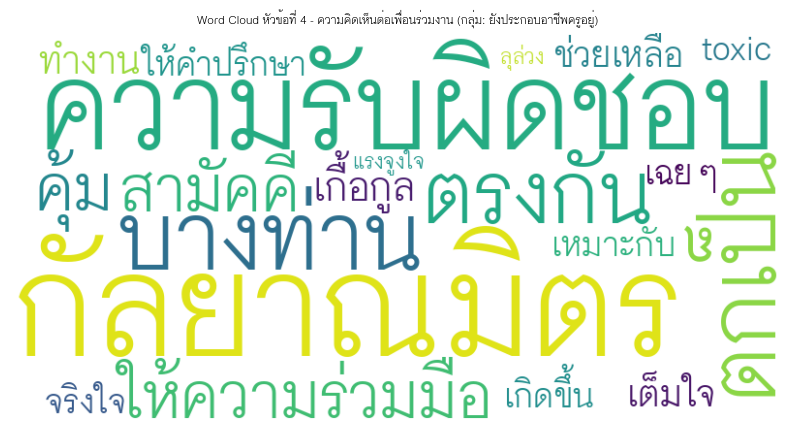

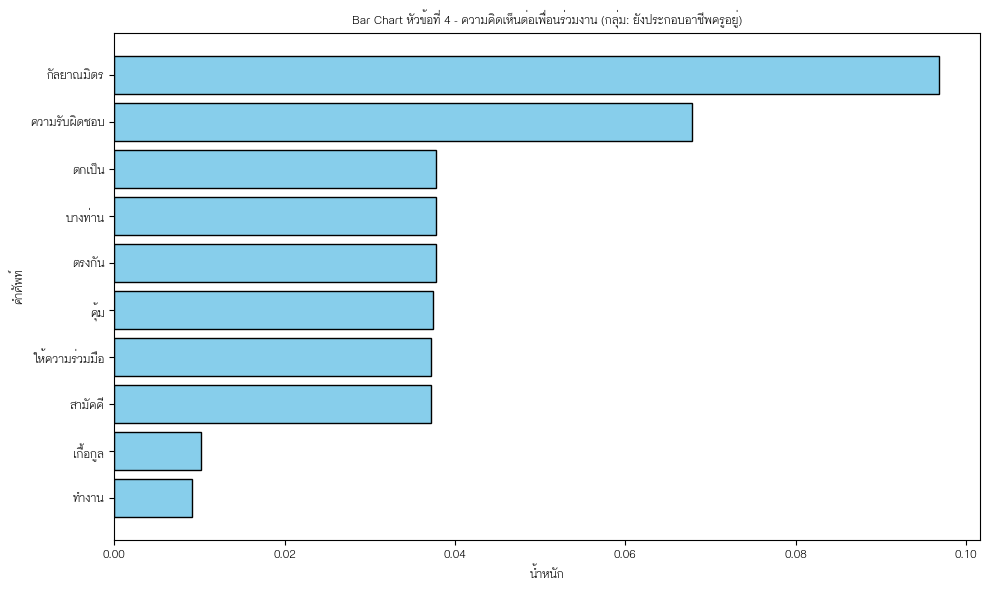


Creating Word Cloud and Bar Chart for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อเพื่อนร่วมงาน


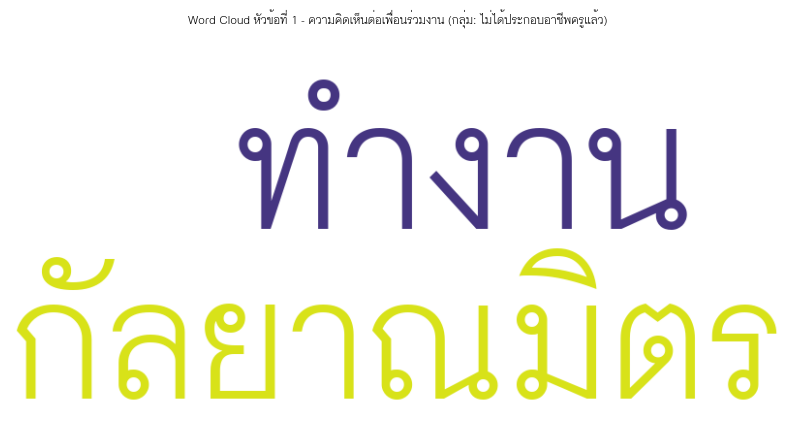

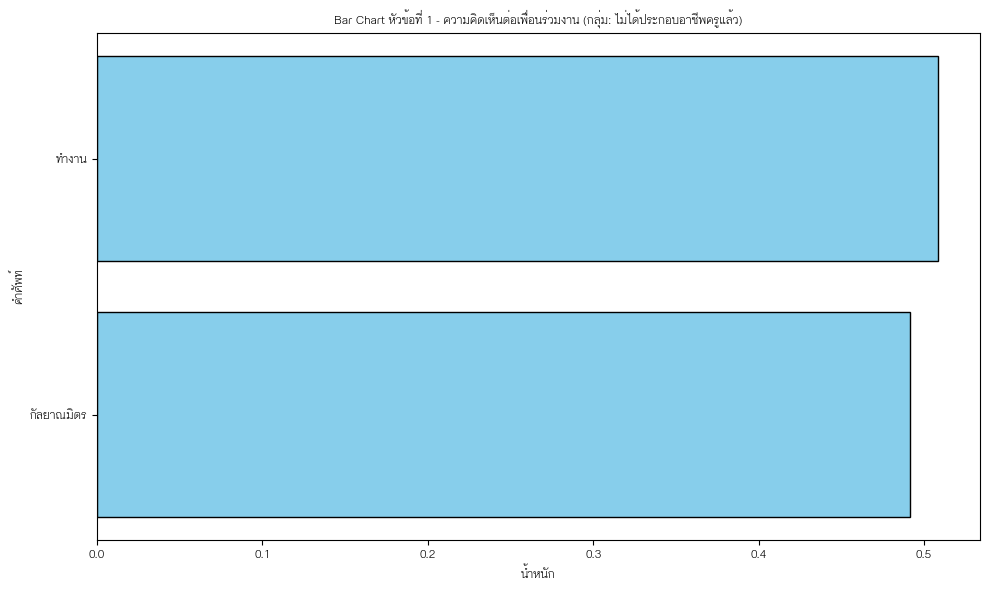

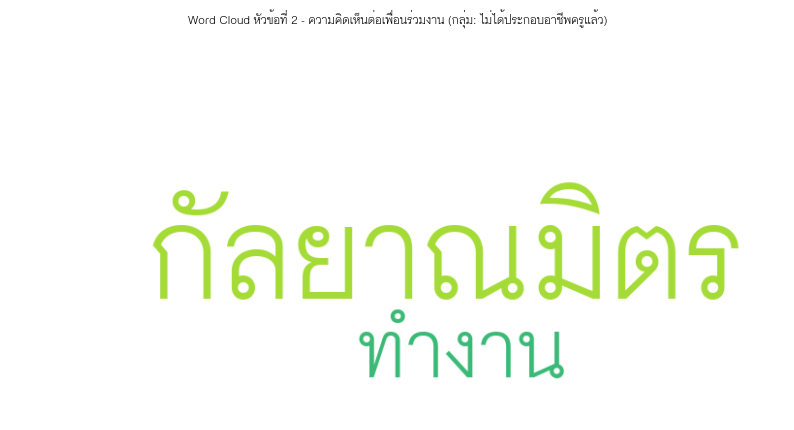

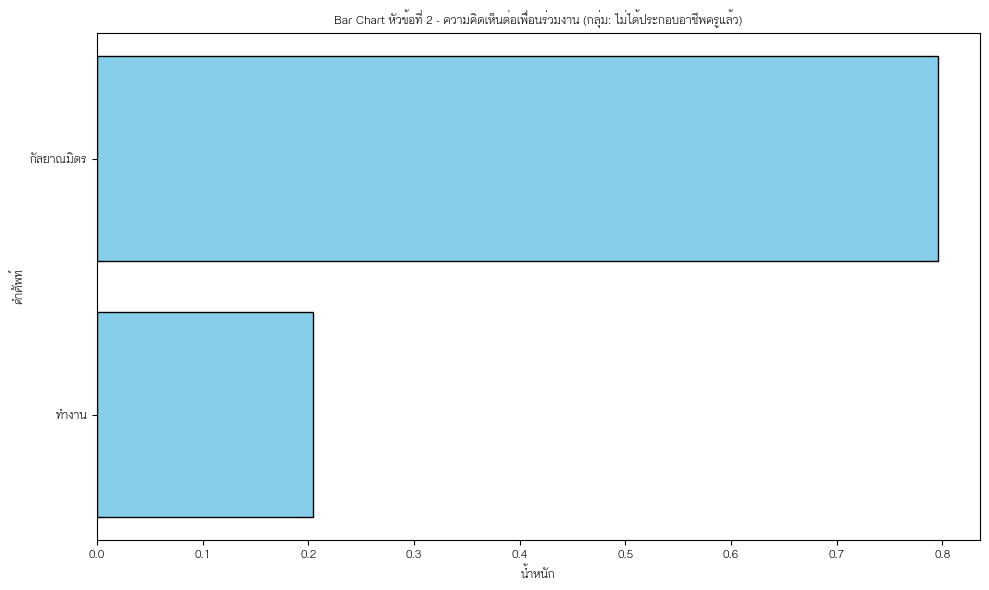

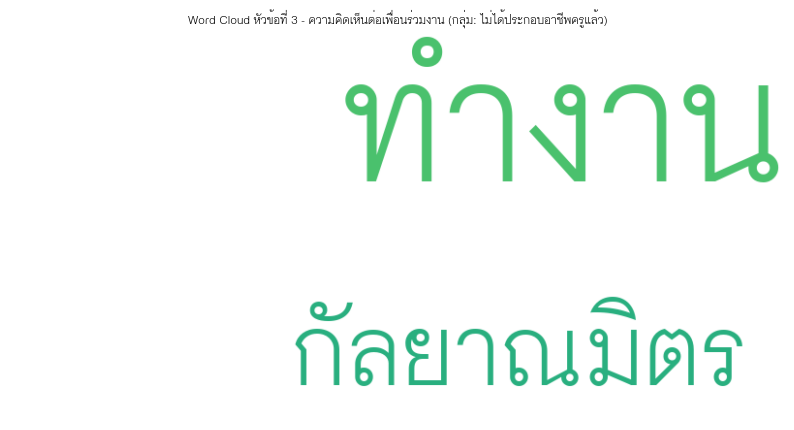

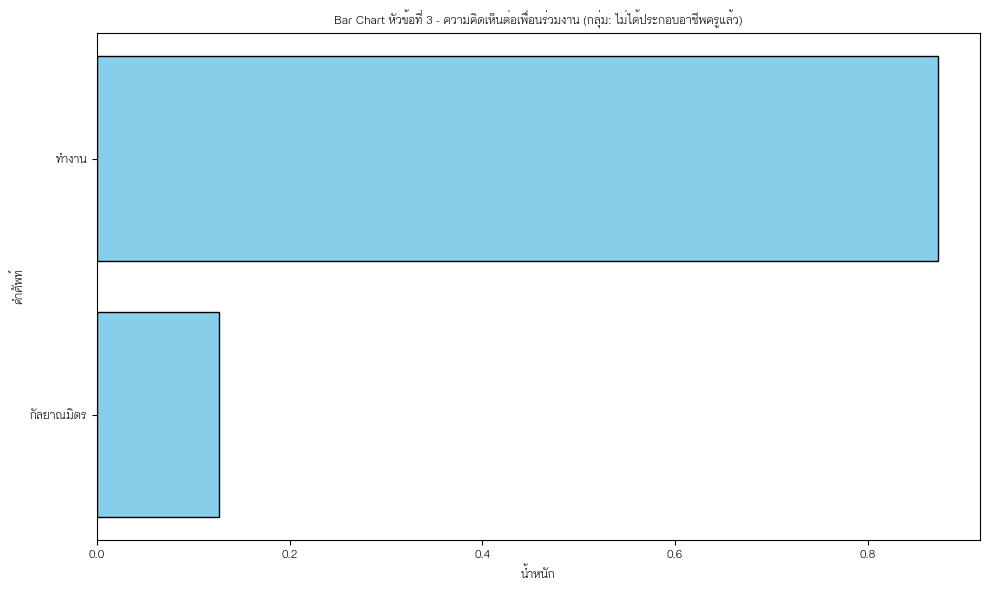


Creating Word Cloud and Bar Chart for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อนักเรียน


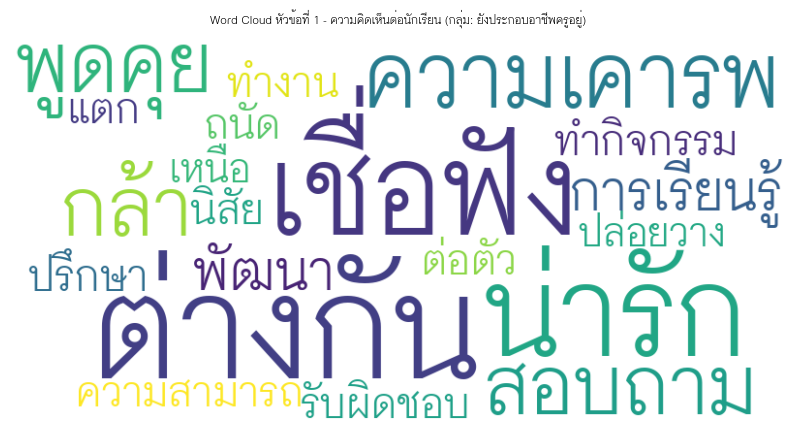

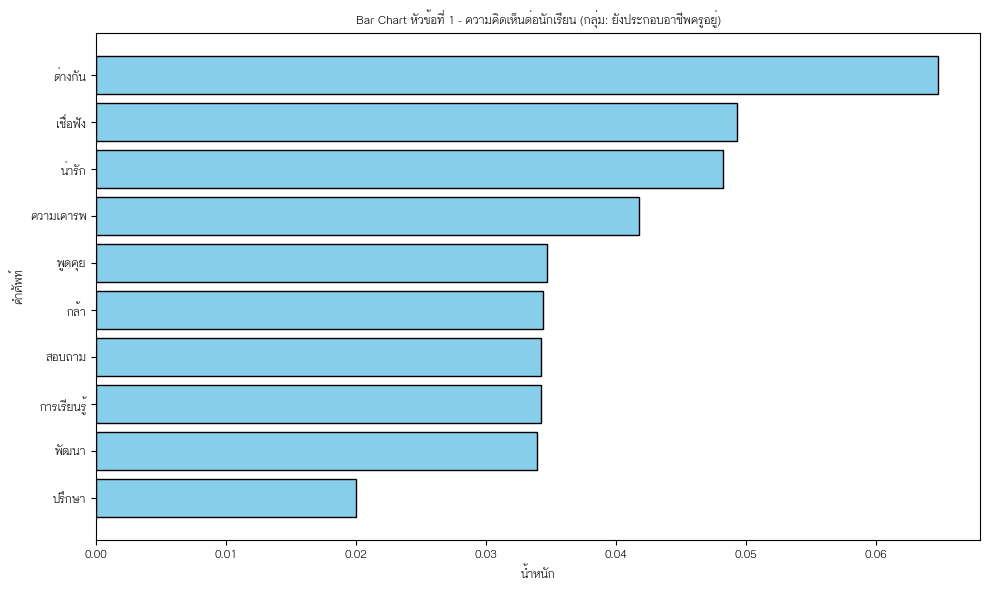

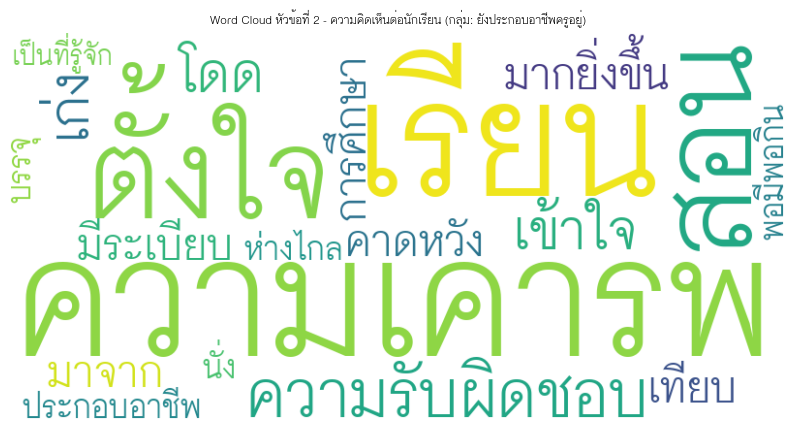

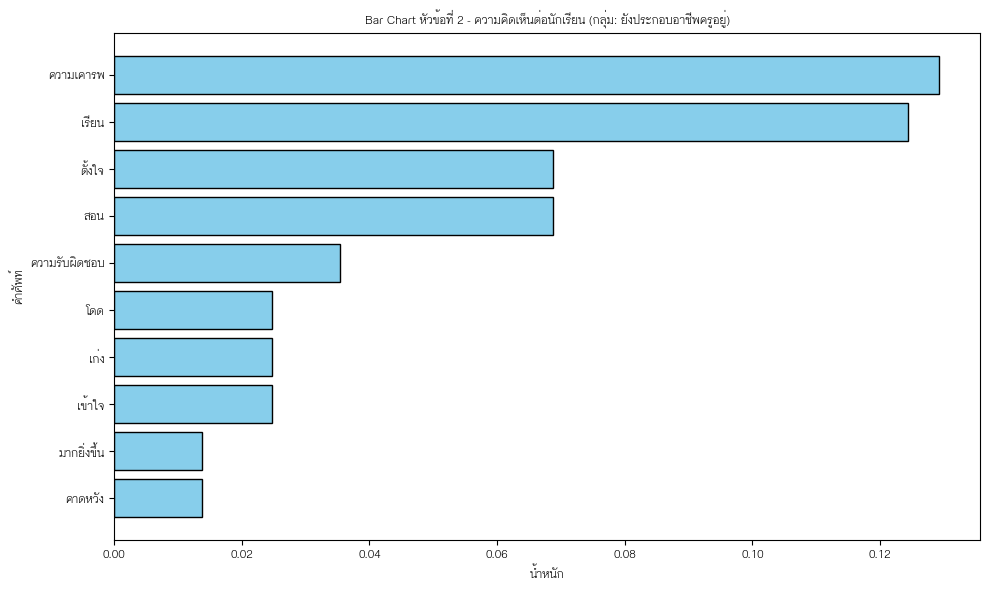

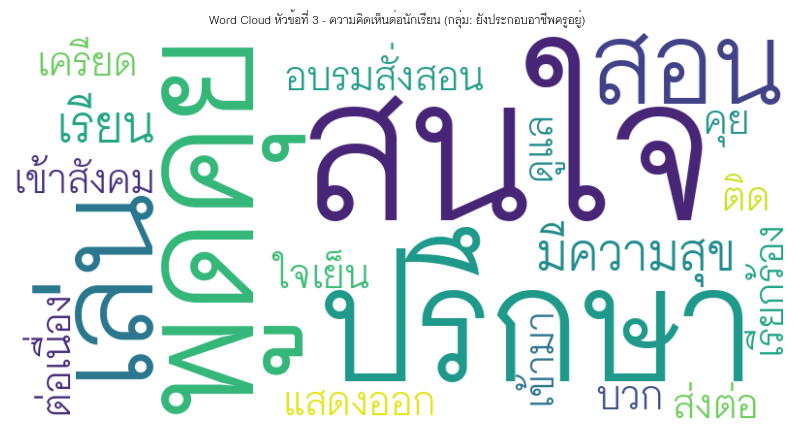

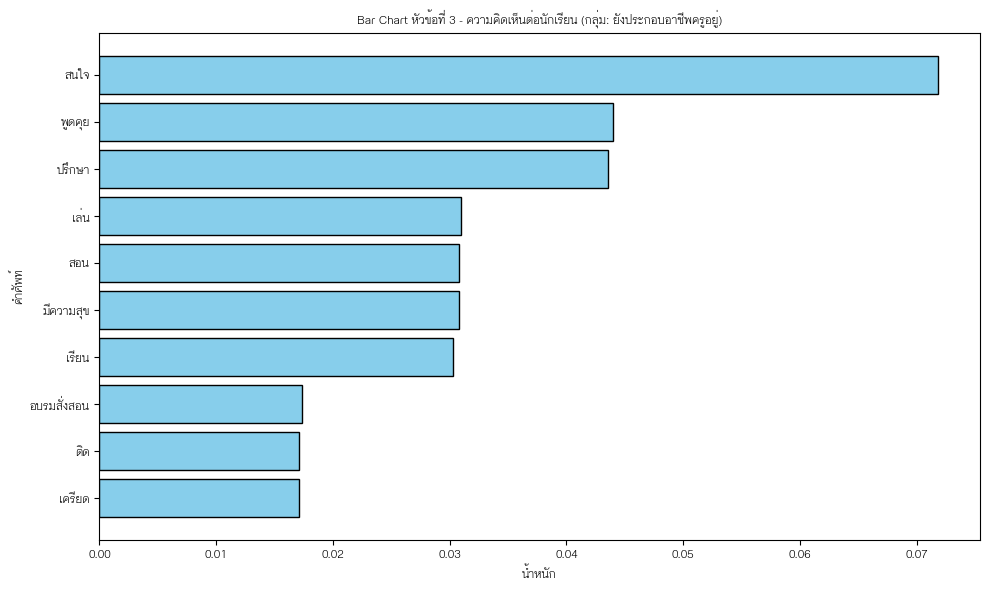

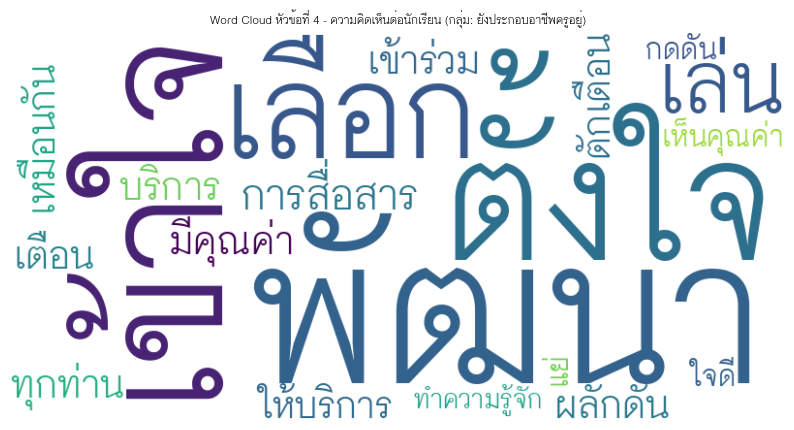

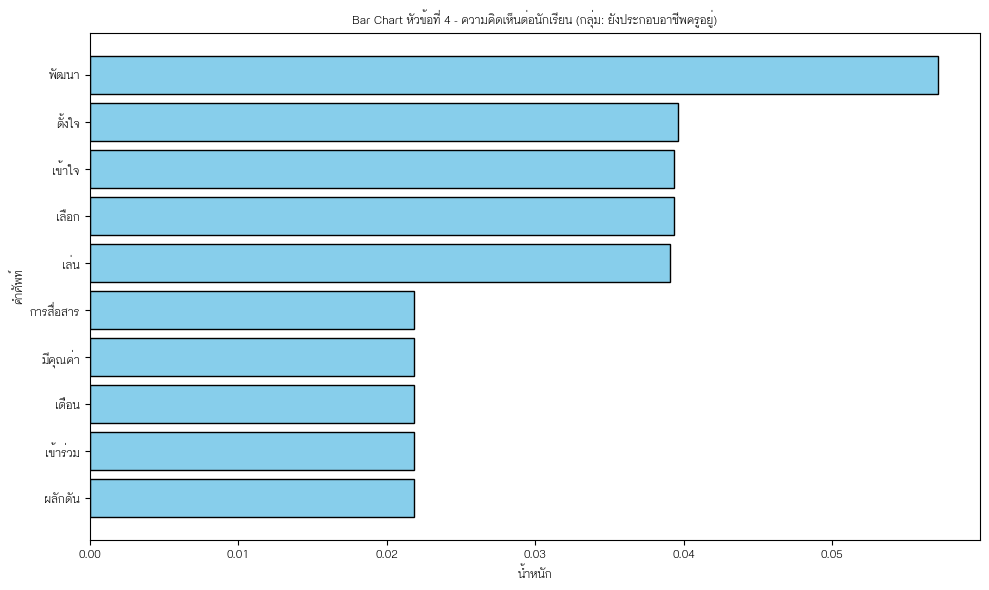


Creating Word Cloud and Bar Chart for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อนักเรียน


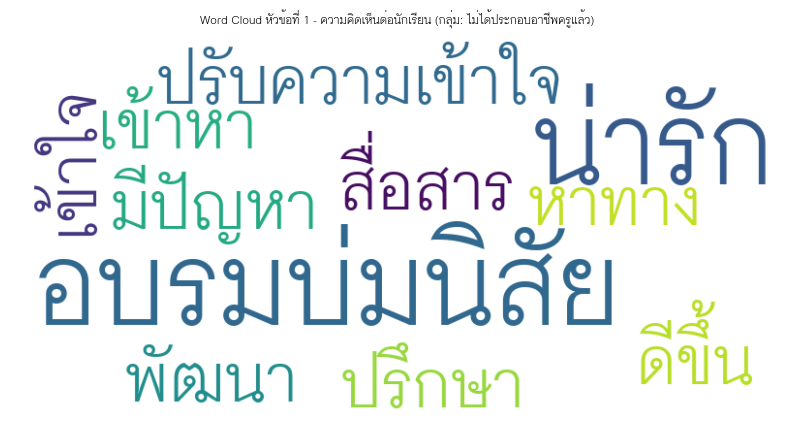

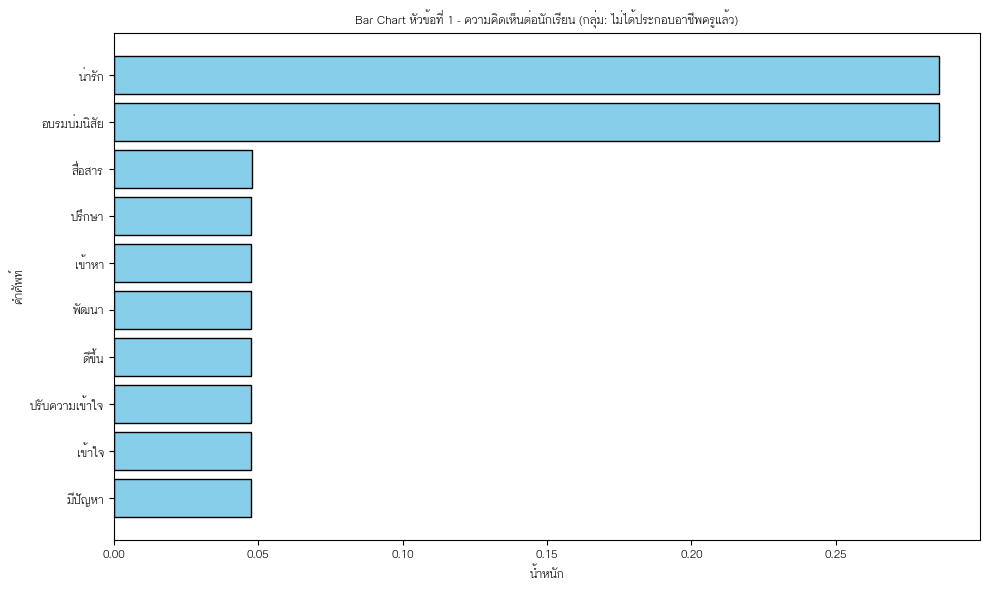

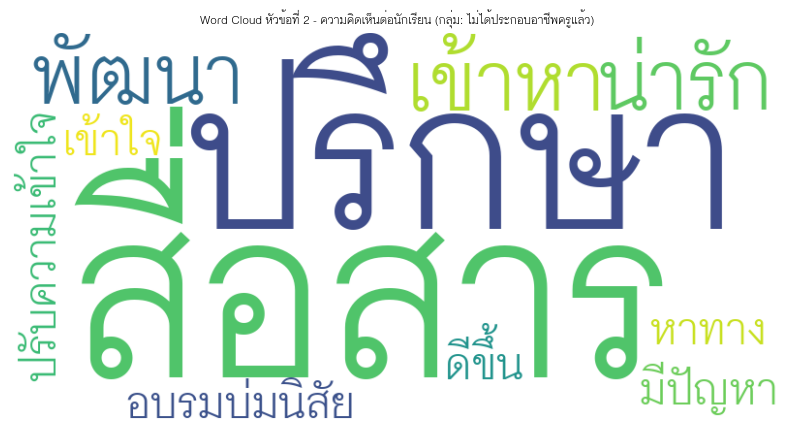

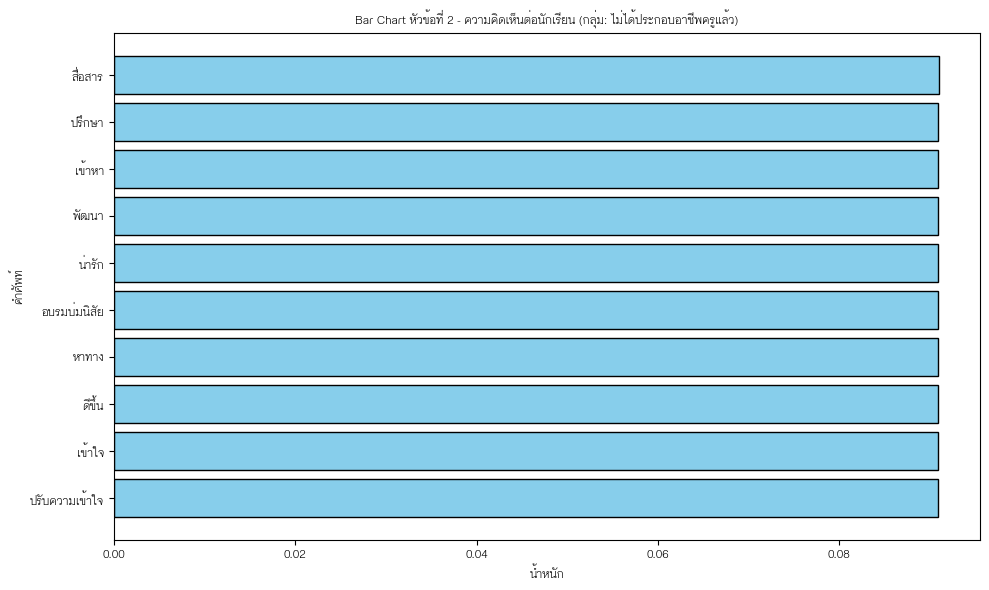

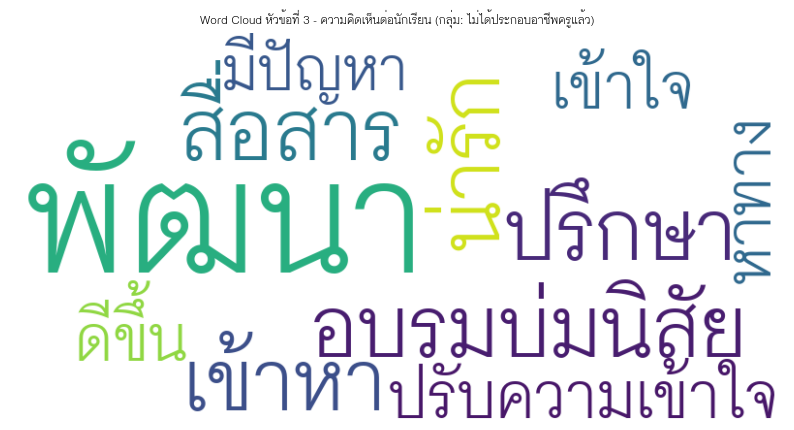

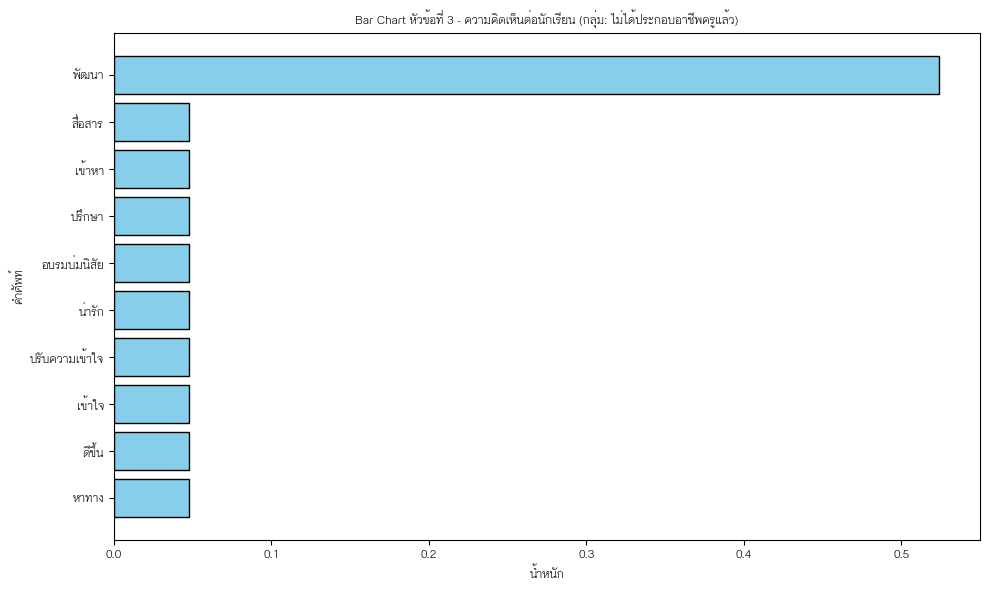

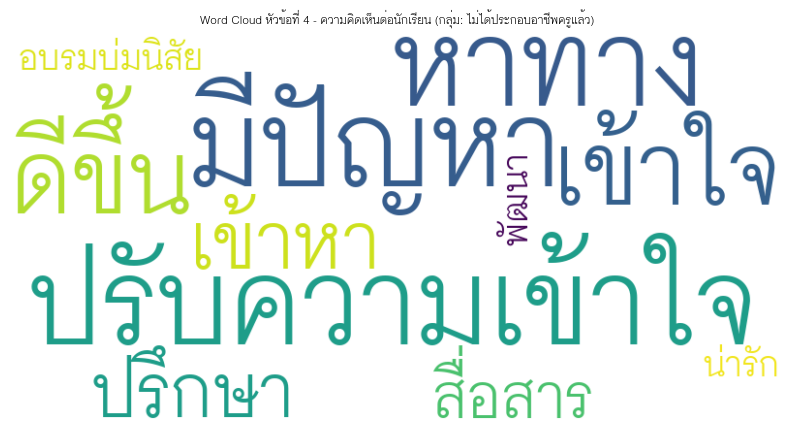

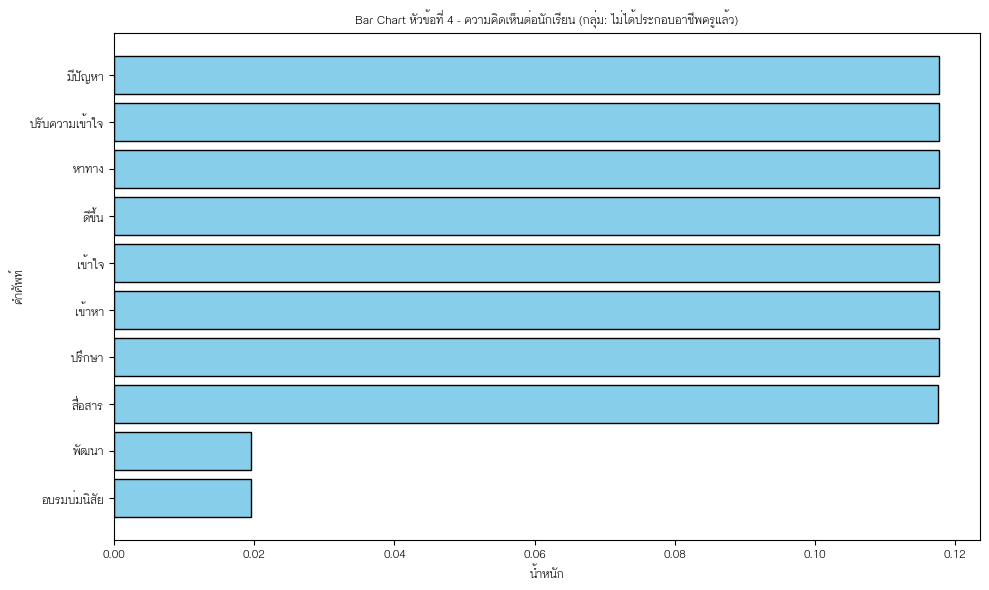

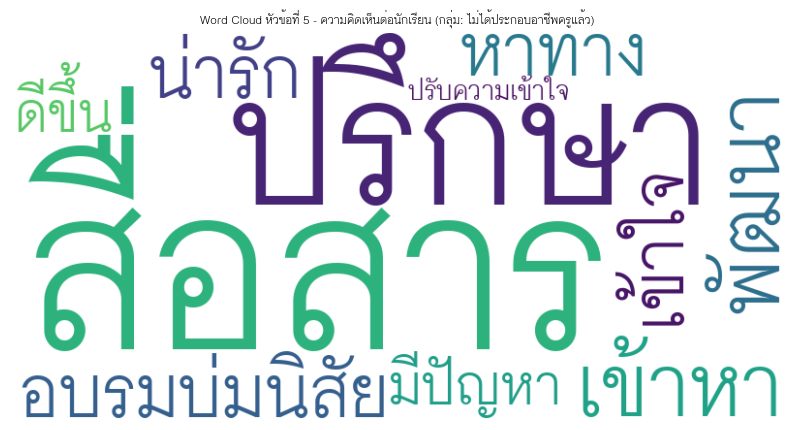

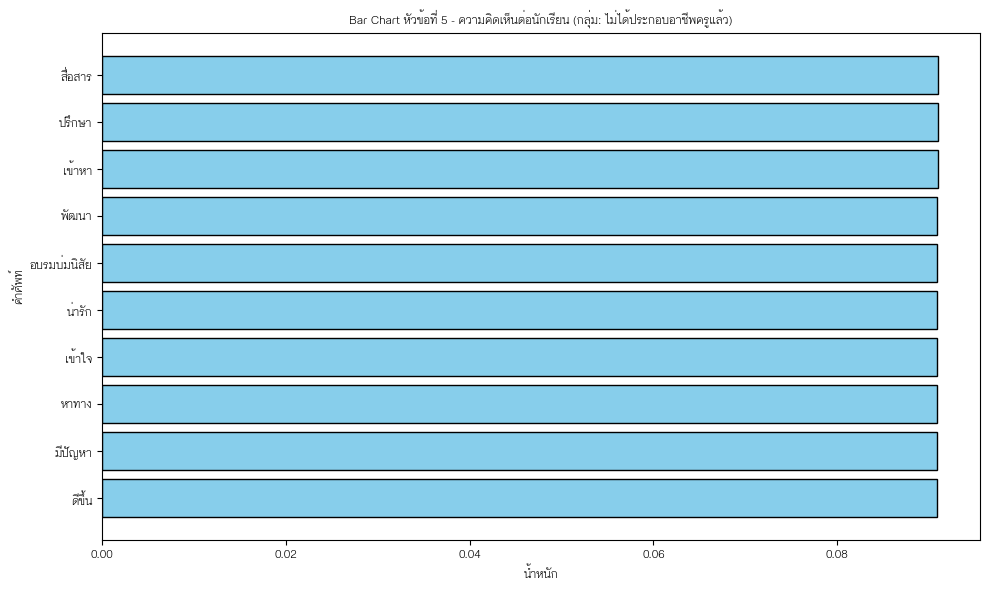

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ฟังก์ชันสร้าง Word Cloud และ Bar Chart
def create_wordcloud_and_barchart_from_lda(lda_model, dictionary, column_title, group_name):
    for topic_id in range(lda_model.num_topics):
        terms = lda_model.get_topic_terms(topic_id, topn=20)
        wordcloud_data = {dictionary[word_id]: weight for word_id, weight in terms}

        # สร้าง Word Cloud
        wordcloud = WordCloud(
            font_path=font_path,
            background_color='white',
            width=800,
            height=400
        ).generate_from_frequencies(wordcloud_data)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud หัวข้อที่ {topic_id + 1} - {column_title} (กลุ่ม: {group_name})", fontproperties=font_prop)
        plt.show()

        # สร้าง Bar Chart
        top_words = list(wordcloud_data.keys())[:10]
        top_weights = list(wordcloud_data.values())[:10]

        plt.figure(figsize=(10, 6))
        plt.barh(top_words, top_weights, color='skyblue', edgecolor='black')
        plt.gca().invert_yaxis()  # ทำให้คำเรียงลำดับจากบนลงล่าง
        plt.xlabel("น้ำหนัก", fontproperties=font_prop)
        plt.ylabel("คำศัพท์", fontproperties=font_prop)
        plt.title(f"Bar Chart หัวข้อที่ {topic_id + 1} - {column_title} (กลุ่ม: {group_name})", fontproperties=font_prop)
        plt.xticks(fontproperties=font_prop)
        plt.yticks(fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# สร้าง Word Cloud และ Bar Chart สำหรับแต่ละกลุ่มและคอลัมน์
for column in selected_columns:
    column_title = column_titles[column]  # ใช้ชื่อที่กำหนดใน column_titles
    for group_name, group_df in grouped_data:
        print(f"\nCreating Word Cloud and Bar Chart for Group: {group_name}, Column: {column_title}")

        # ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
        if (group_name, column) not in optimal_topics:
            print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
            continue

        num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

        # สร้าง Corpus และ Dictionary
        corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
        if not corpus:
            print(f"No valid documents for group {group_name}, column {column_title}.")
            continue

        # สร้าง LDA Model ด้วยจำนวนหัวข้อที่เหมาะสมที่สุด
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

        # สร้าง Word Cloud และ Bar Chart
        create_wordcloud_and_barchart_from_lda(
            lda_model,
            dictionary,
            column_title=column_title,
            group_name=group_name
        )


In [12]:
# ฟังก์ชันดึงคำและน้ำหนักจากแต่ละ Topic พร้อมจัดการ KeyError
def extract_topics_from_lda(lda_model, dictionary, num_words=10):
    """
    ดึงคำและน้ำหนักจากแต่ละหัวข้อใน LDA Model
    :param lda_model: โมเดล LDA
    :param dictionary: Dictionary ของข้อมูล
    :param num_words: จำนวนคำที่ต้องการแสดงในแต่ละหัวข้อ
    :return: DataFrame ที่แสดงคำและน้ำหนักในแต่ละหัวข้อ
    """
    topics = []
    for topic_id, terms in lda_model.show_topics(formatted=False, num_words=num_words):
        for word_id, weight in terms:
            try:
                term = dictionary[word_id]  # ดึงคำจาก dictionary
            except KeyError:
                term = f"[Unknown ID: {word_id}]"  # แสดงข้อความเมื่อคำไม่พบใน dictionary
            topics.append({
                "Topic": topic_id + 1,  # แปลงจาก 0-based index เป็น 1-based index
                "Word": word_id,
                "Term": term,
                "Weight": weight
            })
    return pd.DataFrame(topics)

# ดึงคำจาก LDA Model สำหรับแต่ละกลุ่มและคอลัมน์
for column in selected_columns:
    column_title = column_titles[column]
    for group_name, group_df in grouped_data:
        print(f"\nExtracting topics for Group: {group_name}, Column: {column_title}")

        # ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
        if (group_name, column) not in optimal_topics:
            print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
            continue

        num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

        # สร้าง Corpus และ Dictionary
        corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
        if not corpus:
            print(f"No valid documents for group {group_name}, column {column_title}.")
            continue

        # สร้าง LDA Model
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

        # ดึงคำและน้ำหนักจากแต่ละหัวข้อ
        topics_df = extract_topics_from_lda(lda_model, dictionary, num_words=10)

        # แสดง DataFrame
        print(f"\nTopics for Group: {group_name}, Column: {column_title}")
        print(topics_df)

        # หากต้องการแสดง DataFrame ในเชิงโต้ตอบ
        import ace_tools as tools; tools.display_dataframe_to_user(
            name=f"Topics for {column_title} (Group: {group_name})", dataframe=topics_df
        )



Extracting topics for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อผู้บริหาร

Topics for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อผู้บริหาร
    Topic           Word                         Term    Weight
0       1     ความสามารถ     [Unknown ID: ความสามารถ]  0.094983
1       1       ส่งเสริม       [Unknown ID: ส่งเสริม]  0.049817
2       1        มองเห็น        [Unknown ID: มองเห็น]  0.049783
3       1          ทำงาน          [Unknown ID: ทำงาน]  0.027252
4       1  มีประสิทธิภาพ  [Unknown ID: มีประสิทธิภาพ]  0.027171
5       1             ลา             [Unknown ID: ลา]  0.027165
6       1        มีปัญหา        [Unknown ID: มีปัญหา]  0.027154
7       1     ขับเคลื่อน     [Unknown ID: ขับเคลื่อน]  0.027154
8       1        โปร่งใส        [Unknown ID: โปร่งใส]  0.027154
9       1       เอนเอียง       [Unknown ID: เอนเอียง]  0.027154
10      2     วิสัยทัศน์     [Unknown ID: วิสัยทัศน์]  0.113372
11      2          พัฒนา          [Unknown ID: พัฒนา]  0.076451
12      2

ModuleNotFoundError: No module named 'ace_tools'

In [13]:
# เลือกเฉพาะคอลัมน์ "ความคิดเห็นต่อเพื่อนร่วมงาน"
column = "tokens_col"
column_title = column_titles[column]

for group_name, group_df in grouped_data:
    print(f"\nExtracting topics for Group: {group_name}, Column: {column_title}")

    # ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
    if (group_name, column) not in optimal_topics:
        print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
        continue

    num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

    # สร้าง Corpus และ Dictionary
    corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
    if not corpus:
        print(f"No valid documents for group {group_name}, column {column_title}.")
        continue

    # สร้าง LDA Model
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

    # ดึงคำและน้ำหนักจากแต่ละหัวข้อ
    topics_df = extract_topics_from_lda(lda_model, dictionary, num_words=10)

    # แสดง DataFrame
    print(f"\nTopics for Group: {group_name}, Column: {column_title}")
    print(topics_df)

    # หากต้องการแสดง DataFrame ในเชิงโต้ตอบ
    import ace_tools as tools; tools.display_dataframe_to_user(
        name=f"Topics for {column_title} (Group: {group_name})", dataframe=topics_df
    )



Extracting topics for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อเพื่อนร่วมงาน

Topics for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อเพื่อนร่วมงาน
    Topic            Word                          Term    Weight
0       1            สนิท            [Unknown ID: สนิท]  0.058728
1       1          ปรึกษา          [Unknown ID: ปรึกษา]  0.041151
2       1       ความเคารพ       [Unknown ID: ความเคารพ]  0.040657
3       1           แนะนำ           [Unknown ID: แนะนำ]  0.040642
4       1      เป็นกันเอง      [Unknown ID: เป็นกันเอง]  0.040632
5       1       ช่วยเหลือ       [Unknown ID: ช่วยเหลือ]  0.028289
6       1  ให้ความร่วมมือ  [Unknown ID: ให้ความร่วมมือ]  0.022728
7       1         ช่วยกัน         [Unknown ID: ช่วยกัน]  0.022684
8       1            อายุ            [Unknown ID: อายุ]  0.022587
9       1            อคติ            [Unknown ID: อคติ]  0.022587
10      2       ช่วยเหลือ       [Unknown ID: ช่วยเหลือ]  0.265866
11      2            ดูแล            [Unk

ModuleNotFoundError: No module named 'ace_tools'

In [14]:
# เลือกเฉพาะคอลัมน์ "ความคิดเห็นต่อนักเรียน"
column = "tokens_std"
column_title = column_titles[column]

for group_name, group_df in grouped_data:
    print(f"\nExtracting topics for Group: {group_name}, Column: {column_title}")

    # ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
    if (group_name, column) not in optimal_topics:
        print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
        continue

    num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

    # สร้าง Corpus และ Dictionary
    corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
    if not corpus:
        print(f"No valid documents for group {group_name}, column {column_title}.")
        continue

    # สร้าง LDA Model
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

    # ดึงคำและน้ำหนักจากแต่ละหัวข้อ
    topics_df = extract_topics_from_lda(lda_model, dictionary, num_words=10)

    # แสดง DataFrame
    print(f"\nTopics for Group: {group_name}, Column: {column_title}")
    print(topics_df)

    # หากต้องการแสดง DataFrame ในเชิงโต้ตอบ
    import ace_tools as tools; tools.display_dataframe_to_user(
        name=f"Topics for {column_title} (Group: {group_name})", dataframe=topics_df
    )




Extracting topics for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อนักเรียน

Topics for Group: ยังประกอบอาชีพครูอยู่, Column: ความคิดเห็นต่อนักเรียน
    Topic           Word                         Term    Weight
0       1        ต่างกัน        [Unknown ID: ต่างกัน]  0.064773
1       1       เชื่อฟัง       [Unknown ID: เชื่อฟัง]  0.049322
2       1         น่ารัก         [Unknown ID: น่ารัก]  0.048206
3       1      ความเคารพ      [Unknown ID: ความเคารพ]  0.041759
4       1         พูดคุย         [Unknown ID: พูดคุย]  0.034713
5       1           กล้า           [Unknown ID: กล้า]  0.034348
6       1         สอบถาม         [Unknown ID: สอบถาม]  0.034206
7       1    การเรียนรู้    [Unknown ID: การเรียนรู้]  0.034205
8       1          พัฒนา          [Unknown ID: พัฒนา]  0.033929
9       1         ปรึกษา         [Unknown ID: ปรึกษา]  0.020007
10      2      ความเคารพ      [Unknown ID: ความเคารพ]  0.129201
11      2          เรียน          [Unknown ID: เรียน]  0.124335
12      2  

ModuleNotFoundError: No module named 'ace_tools'

In [15]:
# กำหนดกลุ่มที่สนใจ
group_name = "ไม่ได้ประกอบอาชีพครูแล้ว"

# วนลูปดึงข้อมูลสำหรับทั้ง 3 คอลัมน์
for column in selected_columns:
    column_title = column_titles[column]
    print(f"\nExtracting topics for Group: {group_name}, Column: {column_title}")

    # ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
    if (group_name, column) not in optimal_topics:
        print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
        continue

    num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

    # ดึงข้อมูลของกลุ่ม
    try:
        group_df = grouped_data.get_group(group_name)
    except KeyError:
        print(f"No data found for group {group_name}.")
        continue

    # สร้าง Corpus และ Dictionary
    corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
    if not corpus:
        print(f"No valid documents for group {group_name}, column {column_title}.")
        continue

    # สร้าง LDA Model
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

    # ดึงคำและน้ำหนักจากแต่ละหัวข้อ
    topics_df = extract_topics_from_lda(lda_model, dictionary, num_words=10)

    # แสดง DataFrame
    print(f"\nTopics for Group: {group_name}, Column: {column_title}")
    print(topics_df)

    # แสดง DataFrame เชิงโต้ตอบ
    import ace_tools as tools; tools.display_dataframe_to_user(
        name=f"Topics for {column_title} (Group: {group_name})", dataframe=topics_df
    )



Extracting topics for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อผู้บริหาร

Topics for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อผู้บริหาร
    Topic        Word                      Term    Weight
0       1    สอดคล้อง    [Unknown ID: สอดคล้อง]  0.284847
1       1     ปฎิบัติ     [Unknown ID: ปฎิบัติ]  0.284847
2       1  วิสัยทัศน์  [Unknown ID: วิสัยทัศน์]  0.071807
3       1       ลาออก       [Unknown ID: ลาออก]  0.071806
4       1   ควรจะเป็น   [Unknown ID: ควรจะเป็น]  0.071776
5       1     โปร่งใส     [Unknown ID: โปร่งใส]  0.071640
6       1    บ้าอำนาจ    [Unknown ID: บ้าอำนาจ]  0.071639
7       1      จริงใจ      [Unknown ID: จริงใจ]  0.071639
8       2      จริงใจ      [Unknown ID: จริงใจ]  0.173881
9       2    บ้าอำนาจ    [Unknown ID: บ้าอำนาจ]  0.173881
10      2     โปร่งใส     [Unknown ID: โปร่งใส]  0.173881
11      2       ลาออก       [Unknown ID: ลาออก]  0.173642
12      2  วิสัยทัศน์  [Unknown ID: วิสัยทัศน์]  0.173641
13      2   ควรจะเป็น  

ModuleNotFoundError: No module named 'ace_tools'

In [18]:
# เลือกเฉพาะคอลัมน์ "ความคิดเห็นต่อเพื่อนร่วมงาน"
column = "tokens_std"
column_title = column_titles[column]

# กำหนดกลุ่มที่สนใจ
group_name = "ไม่ได้ประกอบอาชีพครูแล้ว"

print(f"\nExtracting topics for Group: {group_name}, Column: {column_title}")

# ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
if (group_name, column) not in optimal_topics:
    print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
else:
    num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

    # ดึงข้อมูลของกลุ่ม
    try:
        group_df = grouped_data.get_group(group_name)
    except KeyError:
        print(f"No data found for group {group_name}.")
    else:
        # สร้าง Corpus และ Dictionary
        corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
        if not corpus:
            print(f"No valid documents for group {group_name}, column {column_title}.")
        else:
            # สร้าง LDA Model
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

            # ดึงคำและน้ำหนักจากแต่ละหัวข้อ
            topics_df = extract_topics_from_lda(lda_model, dictionary, num_words=10)

            # แสดง DataFrame
            print(f"\nTopics for Group: {group_name}, Column: {column_title}")
            print(topics_df)

            # แสดง DataFrame เชิงโต้ตอบ
            import ace_tools as tools; tools.display_dataframe_to_user(
                name=f"Topics for {column_title} (Group: {group_name})", dataframe=topics_df
            )



Extracting topics for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อนักเรียน

Topics for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อนักเรียน
    Topic            Word                          Term    Weight
0       1          น่ารัก          [Unknown ID: น่ารัก]  0.285677
1       1    อบรมบ่มนิสัย    [Unknown ID: อบรมบ่มนิสัย]  0.285677
2       1         สื่อสาร         [Unknown ID: สื่อสาร]  0.047647
3       1          ปรึกษา          [Unknown ID: ปรึกษา]  0.047630
4       1          เข้าหา          [Unknown ID: เข้าหา]  0.047630
5       1           พัฒนา           [Unknown ID: พัฒนา]  0.047629
6       1          ดีขึ้น          [Unknown ID: ดีขึ้น]  0.047622
7       1  ปรับความเข้าใจ  [Unknown ID: ปรับความเข้าใจ]  0.047622
8       1          เข้าใจ          [Unknown ID: เข้าใจ]  0.047622
9       1         มีปัญหา         [Unknown ID: มีปัญหา]  0.047622
10      2         สื่อสาร         [Unknown ID: สื่อสาร]  0.090993
11      2          ปรึกษา          [Unknown I

ModuleNotFoundError: No module named 'ace_tools'

In [17]:
# เลือกเฉพาะคอลัมน์ "ความคิดเห็นต่อนักเรียน"
column = "tokens_std"
column_title = column_titles[column]

# กำหนดกลุ่มที่สนใจ
group_name = "ไม่ได้ประกอบอาชีพครูแล้ว"

print(f"\nExtracting topics for Group: {group_name}, Column: {column_title}")

# ตรวจสอบว่ามีจำนวนหัวข้อที่เหมาะสมที่สุดหรือไม่
if (group_name, column) not in optimal_topics:
    print(f"Skipping Group: {group_name}, Column: {column_title} - No optimal topics found.")
else:
    num_topics = optimal_topics[(group_name, column)]  # จำนวนหัวข้อที่เหมาะสมที่สุด

    # ดึงข้อมูลของกลุ่ม
    try:
        group_df = grouped_data.get_group(group_name)
    except KeyError:
        print(f"No data found for group {group_name}.")
    else:
        # สร้าง Corpus และ Dictionary
        corpus, dictionary, docs = prepare_corpus_and_dictionary(group_df[column])
        if not corpus:
            print(f"No valid documents for group {group_name}, column {column_title}.")
        else:
            # สร้าง LDA Model
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

            # ดึงคำและน้ำหนักจากแต่ละหัวข้อ
            topics_df = extract_topics_from_lda_fixed(lda_model, dictionary, num_words=10)

            # แสดง DataFrame
            print(f"\nTopics for Group: {group_name}, Column: {column_title}")
            print(topics_df)

            # แสดง DataFrame เชิงโต้ตอบ
            import ace_tools as tools; tools.display_dataframe_to_user(
                name=f"Topics for {column_title} (Group: {group_name})", dataframe=topics_df
            )




Extracting topics for Group: ไม่ได้ประกอบอาชีพครูแล้ว, Column: ความคิดเห็นต่อนักเรียน


NameError: name 'extract_topics_from_lda_fixed' is not defined